# **Loan Default Prediction**

## **Executive Summary**


Our project predicts a client's likelihood of defaulting on their loan and also identifies the factors that are most important when approving a loan to understand the likelihood of consumer default.

Through our analysis, the most optimal model for loan default prediction is the tuned decision tree. This model helps us correctly identify the most borrowers who will default while also minimizing the number of borrowers who may be granted a loan but eventually default on it. This model is interpretable and gives us a comprehensive breakdown of the factors that help classify borrowers.

Among these borrowers, we found that the debt to income ratio was the most impactful factor that drove a borrower's ability to repay their loan or default on it altogether. The age of the oldest credit line for a borrower was another significant factor.

The stakeholders should set a standard and require all borrowers to report their debt to income ratios, especially since this figure was the most missing among all factors and it was viewed as most pertinent by our model. The treatment of outliers and missing values in this variable is greatly connected to our analysis. Stakeholders should do some additional digging to understand why borrowers are not reporting this ratio. The bank can also benefit by requesting additional credit worthiness metrics to fill this missing information gap.  

As a result of our loan review, we will help the bank mitigate the risk of default in future borrowers and simplify their decision making process.

## **Problem Definition**

- We are trying to solve for the ideal consumer who defaults on their home equity loan through a classification model. We can give the bank recommendations accordingly. This will give the bank a good idea of what type of consumers to better target and what type of consumers to better avoid when offering financial backing for such a large investment.

 - The bank's bottom line is directly impacted by their loan granting system. If the bank provides loans to consumer who may default, they risk losing millions of dollars. This risk management dilemma is the most important when considering the bank's livelihood and our proposed solution.
 - Finding a solution will help the bank understand tradeoffs between a borrower's potential interest revenue if loans are paid or a borrower's loss if loans are not paid. Understanding a borrower and his or her likelihood for potential outcomes will help the bank make better decisions.
 - This issue will also guide the real estate market to more optimally control the supply/demand market for houses. It will create a framework to monitor different real estate conditions among borrowers in different markets across the nation. If borrowers in a specific real estate market are defaulting more frequently, the bank may be able to raise the alarm ahead of time.

### **The Key Questions:**

- What factors drive the target (BAD) variable to a 1 (client defaulted on loan) vs a 0 (client repaid loan)?
- What are the different common profile consumer finance metrics of loan borrowers in the HMEQ dataset?
- Why are consumers seeking a home equity loan?
- What models best predict a borrower's default rate?
- How will the bank implement the most optimal model?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building for prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# To tune model, get different metric scores, and split data
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    precision_recall_curve,
    classification_report,
    make_scorer,
)

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Converting dataset if needed

In [ ]:
# Fetching file from saved google directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data
default = pd.read_csv('/content/drive/MyDrive/MIT DSML/Capstone Projects/PDS - Loan Default Prediction/hmeq.csv')

In [ ]:
# Copying data to preserve original data
data = default.copy()

In [ ]:
# Viewing the top 5 rows of the data
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000,39025.000,HomeImp,Other,10.500,0.000,0.000,94.367,1.000,9.000,NaN
1,1,1300,70053.000,68400.000,HomeImp,Other,7.000,0.000,2.000,121.833,0.000,14.000,NaN
2,1,1500,13500.000,16700.000,HomeImp,Other,4.000,0.000,0.000,149.467,1.000,10.000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.000,112000.000,HomeImp,Office,3.000,0.000,0.000,93.333,0.000,14.000,NaN


In [ ]:
# Viewing the bottom 5 rows of the data
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.000,90185.000,DebtCon,Other,16.000,0.000,0.000,221.809,0.000,16.000,36.112
5956,0,89000,54576.000,92937.000,DebtCon,Other,16.000,0.000,0.000,208.692,0.000,15.000,35.860
5957,0,89200,54045.000,92924.000,DebtCon,Other,15.000,0.000,0.000,212.280,0.000,15.000,35.557
5958,0,89800,50370.000,91861.000,DebtCon,Other,14.000,0.000,0.000,213.893,0.000,16.000,34.341
5959,0,89900,48811.000,88934.000,DebtCon,Other,15.000,0.000,0.000,219.601,0.000,16.000,34.572


In [ ]:
# Viewing the shape format of the data
data.shape

(5960, 13)

**Observations:**

- The dataset has **5,960 rows and 13 columns**.
- There **are missing values** in the dataset.

In [ ]:
# Checking the data type composition of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations:**

- There are a total of 5,690 total rows so there should be 5,690 entries per column.
- **Missing values are present in 11 columns and will have to be treated accordingly**. The target variable, 'BAD' has no null values.
- Besides 'REASON' and 'JOB' columns, all other columns are numerical type.

In [ ]:
# Checking for missing values for each column
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
# Finding % of missing values for each column
data.isnull().sum()/data.shape[0]

BAD       0.000
LOAN      0.000
MORTDUE   0.087
VALUE     0.019
REASON    0.042
JOB       0.047
YOJ       0.086
DEROG     0.119
DELINQ    0.097
CLAGE     0.052
NINQ      0.086
CLNO      0.037
DEBTINC   0.213
dtype: float64

In [ ]:
# Checking for duplicates in the data
data.duplicated().sum()

0

**Observations:**

- There are **a few hundred (between 100 - 600) missing values per column in the columns with null values**.
- **'DEBTINC' has an overwhelmingly number of missing values  with 1200+ (21%+ data points missing)** that we will have to meaningfully treat.

In [ ]:
# Gathering the object columns together
cat_cols = data.select_dtypes(['object']).columns.tolist()

In [ ]:
# Appending target variable
cat_cols.append('BAD')

In [ ]:
cat_cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Converting dataset to category type for storage and problem nature
for i in cat_cols:
    data[i] = data[i].astype("category")

In [ ]:
# Confirming the variable change in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


## **Exploratory Data Analysis (EDA) and Visualization**

- Let's investigate and understand the data better before building a model with it.

## Summary Statistics

In [ ]:
# Checking the descriptive statistics of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.000,18607.970,11207.480,1100.000,11100.000,16300.000,23300.000,89900.000
MORTDUE,5442.000,73760.817,44457.609,2063.000,46276.000,65019.000,91488.000,399550.000
VALUE,5848.000,101776.049,57385.775,8000.000,66075.500,89235.500,119824.250,855909.000
YOJ,5445.000,8.922,7.574,0.000,3.000,7.000,13.000,41.000
DEROG,5252.000,0.255,0.846,0.000,0.000,0.000,0.000,10.000
DELINQ,5380.000,0.449,1.127,0.000,0.000,0.000,0.000,15.000
CLAGE,5652.000,179.766,85.810,0.000,115.117,173.467,231.562,1168.234
NINQ,5450.000,1.186,1.729,0.000,0.000,1.000,2.000,17.000
CLNO,5738.000,21.296,10.139,0.000,15.000,20.000,26.000,71.000
DEBTINC,4693.000,33.780,8.602,0.524,29.140,34.818,39.003,203.312


**Observations:**

- The **average 'LOAN' size for a borrower is 18,607 dollars and ranges from 1,110 to 89,900 dollars**.
- **'MORTDUE' and 'VALUE' are the other two numerical columns with large figures** and give us a better understanding of the spectrum of amount of money due on existing mortage and the current property values. **These 3 columns have a huge discrepancy between their third-quartile and their max**. This signifies potential outliers. The means of these columns are much less too. **There are probably very few borrowers that are granted huge loans and have bigger properties**.
- The **rest of the numerical columns also showcase a similiar pattern** where the mean and 75% values are very minimal compared to max values. For example, the **'DEROG' and 'DELINQ' columns showcase a mean of less than 1 report and credit line respectfully. However, their third-quartile values are both 0 and maxes are 10 and 15 respectively**. This highlights alot of data in the low range: **most borrowers have little to no derogatory reports and delinquent lines**.
- **'DEBTINC'** is a numerical column but **is a ratio**. Its summary tells us that **there are many borrowers that are highly levered (taking on lots of debt) relative to their income**. This might give us a good look onto thosed that default and those that repay loans.

In [ ]:
# Checking the descriptive statistics of the categorical columns
data.describe(include = ['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [ ]:
# Printing the number of occurrences of each unique value in each categorical column
for column in cat_cols:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

REASON
DebtCon   0.688
HomeImp   0.312
Name: proportion, dtype: float64
--------------------------------------------------
JOB
Other     0.420
ProfExe   0.225
Office    0.167
Mgr       0.135
Self      0.034
Sales     0.019
Name: proportion, dtype: float64
--------------------------------------------------
BAD
0   0.801
1   0.199
Name: proportion, dtype: float64
--------------------------------------------------


**Observations:**

- **Debt consolidation is the more popular reason of getting a HEQ by almost 2x**. This lines up with our analysis of the 'DEBTINC' from before. The other 30% want financing to enhance their homes.
- **Most jobs of borrowers fall under the "Other" bucket** followed by "Professional Executives" and "Office" jobs.
- Our **target variable has an inherent split of 20/80 between defaulted/not defaulted borrowers**.

### **Univariate Analysis**


In [ ]:
# Function to plot a boxplot and a histogram along the same scale for numerical variables
def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None): # only need data and column for function inputs

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # histogram will be created with lines to indicate mean median
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # add median to the histogram

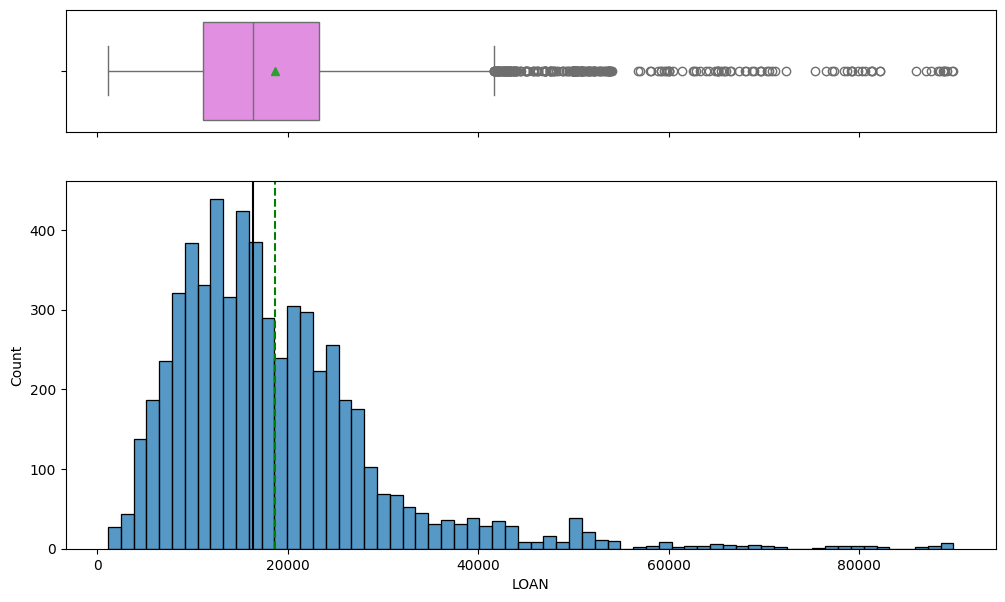

In [ ]:
histogram_boxplot(data, 'LOAN')

**Observations:**

- **'LOAN' figures portray right skewed distribution. There are several borrowers with extremely high approved loan amounts** that are probably outliers. The median and mean are relatively close to each other and both are below 20,000 dollars.

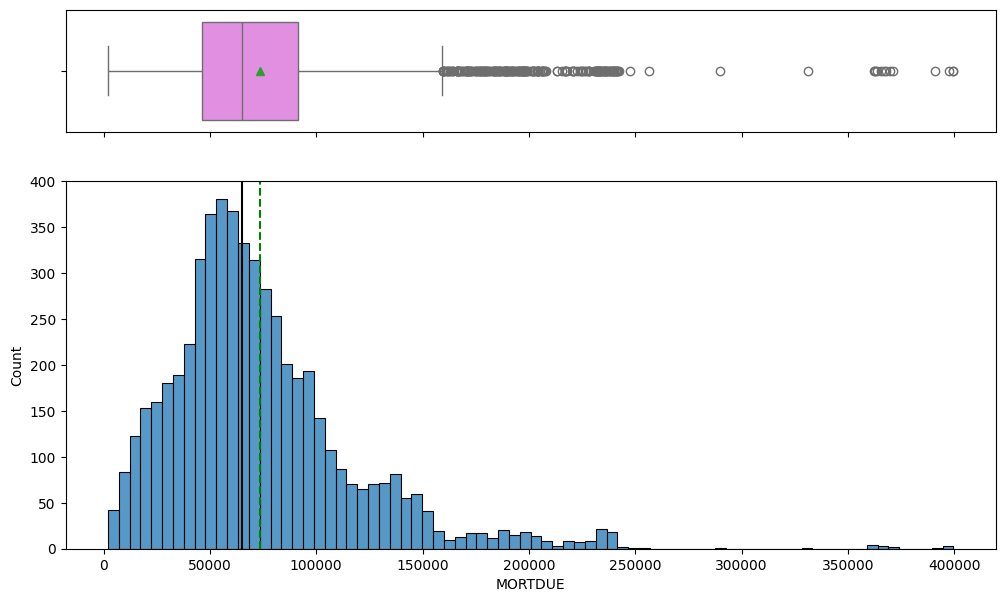

In [ ]:
histogram_boxplot(data, 'MORTDUE')

**Observations:**

- **'MORTDUE' figures portray right skewed distribution. There are several borrowers with higher amounts due on their existing mortage**. They are probably outliers. The median and mean are relatively close to each other and both less than 75,000 dollars.

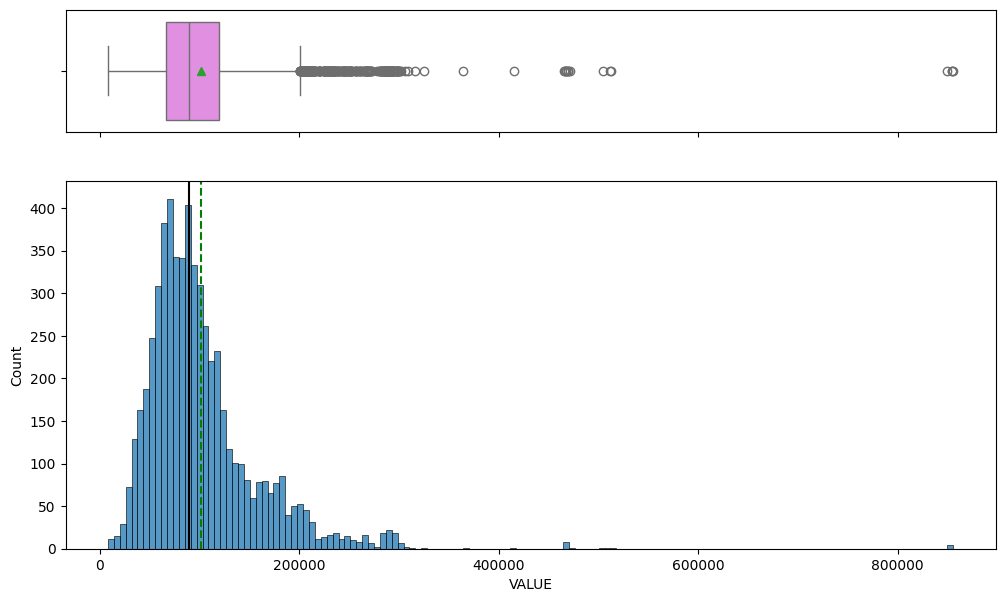

In [ ]:
histogram_boxplot(data, 'VALUE')

**Observations:**

- **'VALUE' figures portray right skewed distribution. There are several borrowers with higher current property values**. They are probably outliers. The median and mean are relatively close to each other at around 100,000 dollars.

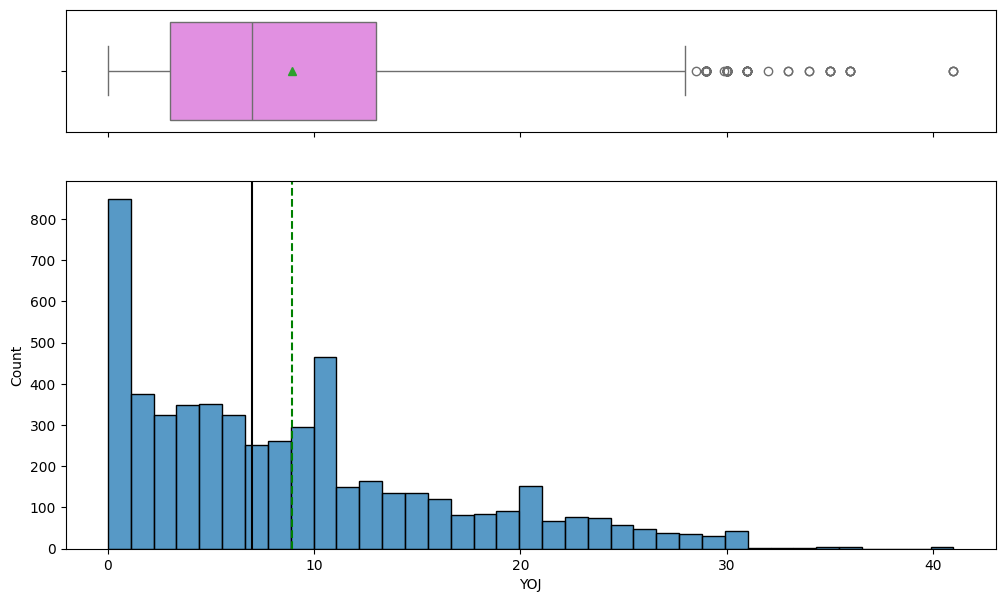

In [ ]:
histogram_boxplot(data, 'YOJ')

**Observations:**

- **'YOJ' figures portray slight right skewed distribution. There are a few borrowers with more years of experience at their current jobs**. They are probably outliers. The median and mean are relatively close to each other between 7 to 9 years.

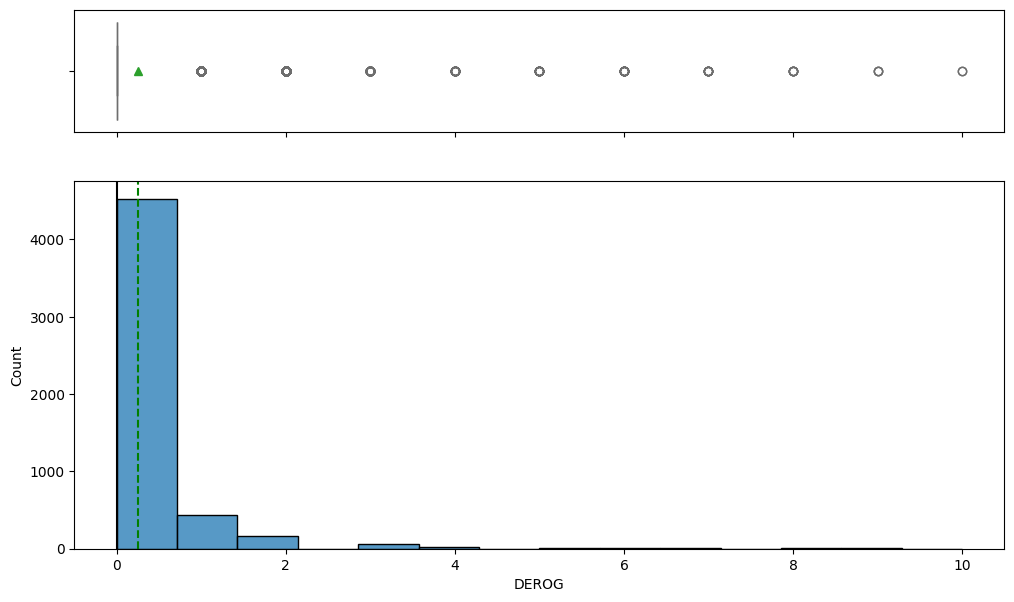

In [ ]:
histogram_boxplot(data, 'DEROG')

**Observations:**

- **'DEROG' figures portray right skewed distribution. There are a few borrowers with a larger number of major derogatory reports but majority of borrowers have none**. These few borrowers are probably outliers. The median and mean are relatively close to each other near 0 derogatory reports.

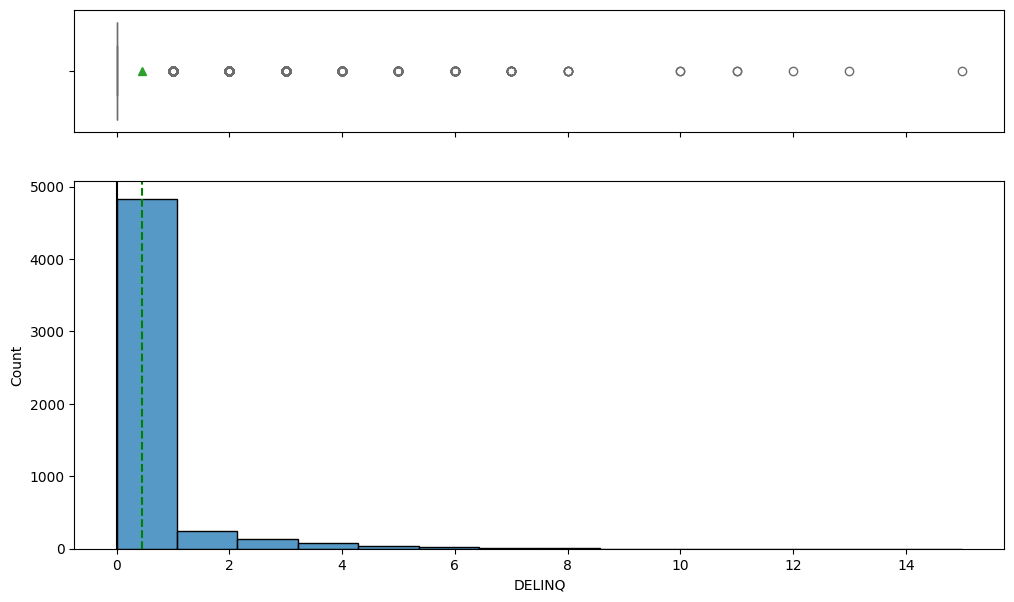

In [ ]:
histogram_boxplot(data, 'DELINQ')

**Observations:**

- **'DELINQ' figures portray right skewed distribution. There are a few borrowers with a larger number of delinquent credit lines but majority of borrowers have none**. These few borrowers are probably outliers. The median and mean are relatively close to each other near 0 delinquent lines of credit.

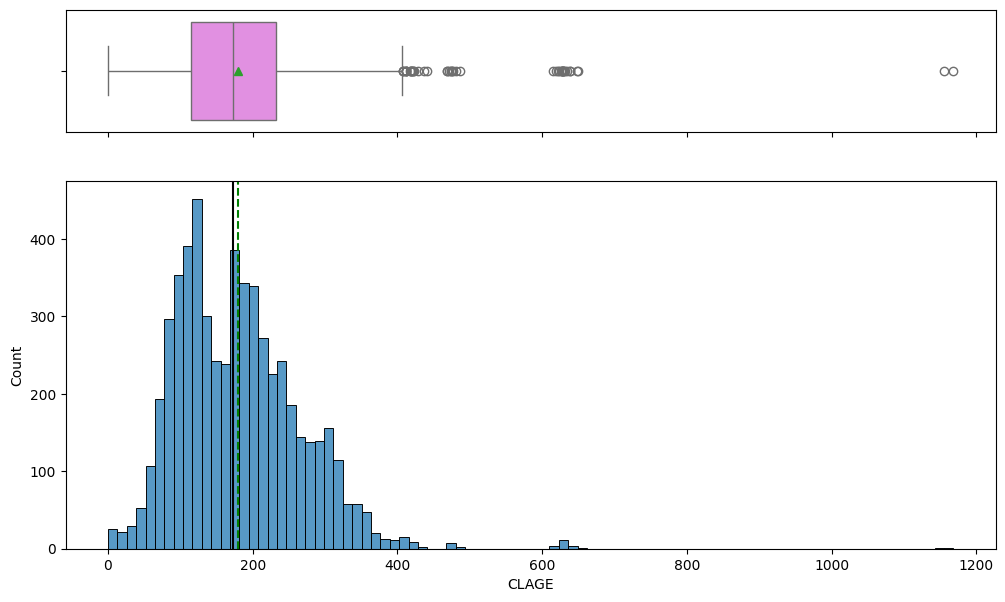

In [ ]:
histogram_boxplot(data, 'CLAGE')

**Observations:**

- **'CLAGE' figures portray bimodal normal distribution**. There seems to be few outliers. The median and mean are relatively close to each other near 180 months of age for the borrower's oldest line of credit. 180 months is 15 years: majority of home loans are offered 30 years so this may mean that many borrowers are near halfway paying down their oldest credit line.  

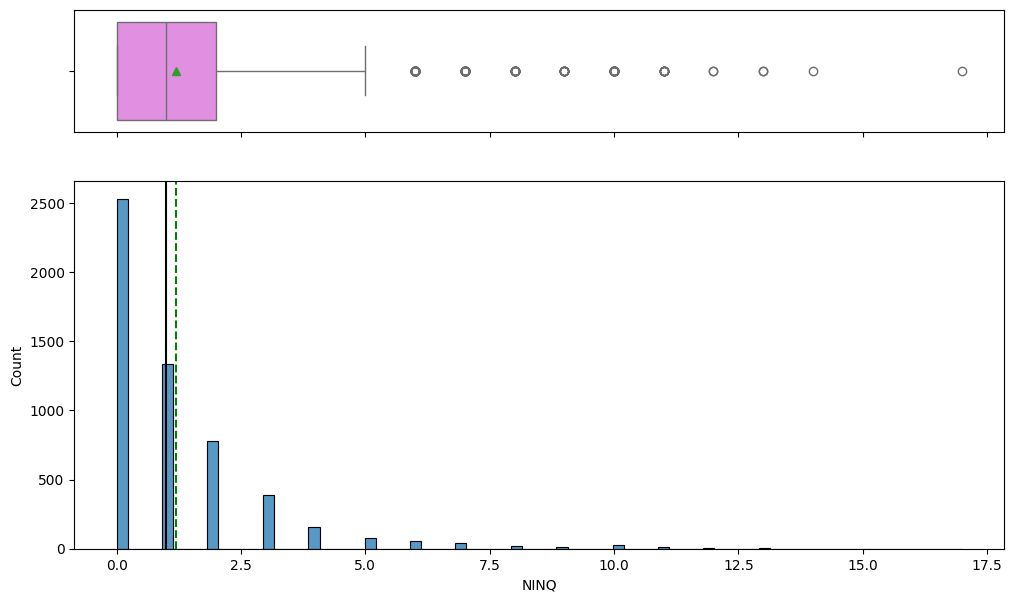

In [ ]:
histogram_boxplot(data, 'NINQ')

**Observations:**

- **'NINQ' figures portray right skewed distribution. There are a few borrowers with more recent credit inquiries than others**. These few borrowers are probably outliers. The median and mean are relatively close to each other near 1 inquiry. A new credit inquiry is a record of when someone requests to view your credit report.

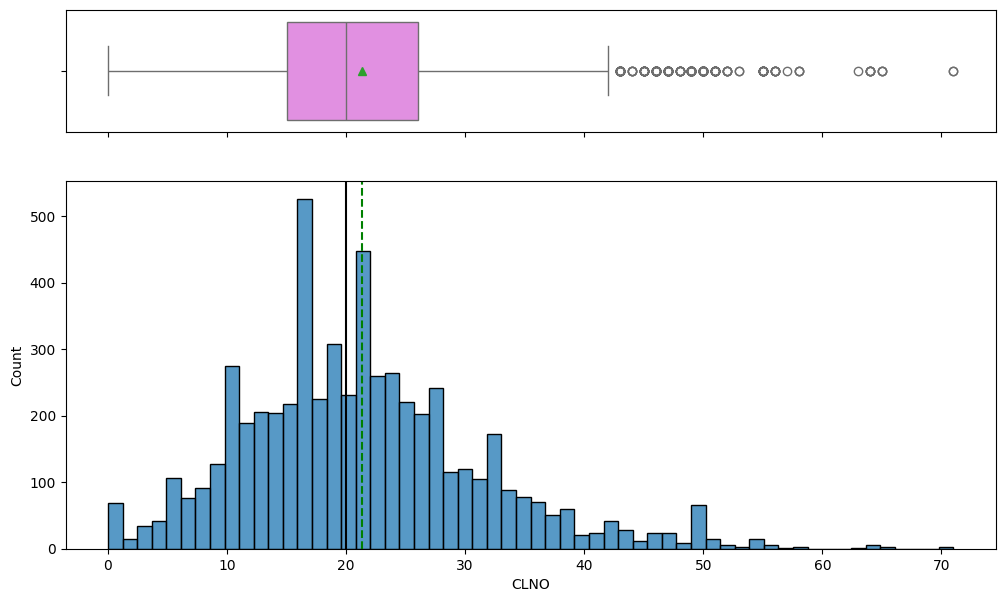

In [ ]:
histogram_boxplot(data, 'CLNO')

**Observations:**

- **'CLNO' figures portray normal distribution with a slight right skew. There are a few borrowers with a higher number of existing credit lines than others**. These few borrowers are probably outliers. The median and mean are relatively close to each other near 20 credit lines. These are current lines of credit/loans that belong to the borrower. This includes their home equity line of credit.

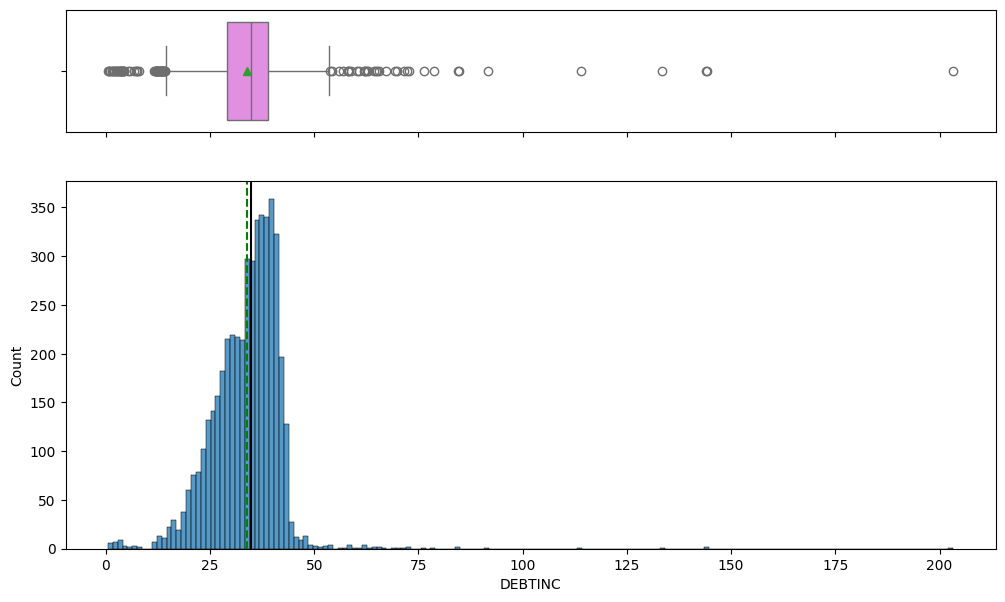

In [ ]:
histogram_boxplot(data, 'DEBTINC')

**Observations:**

- **'DEBTINC' figures portray normal distribution with some right skew as well. There are a some borrowers with lower debt to income ratios and others with higher debt to income ratios**. The borrowers with higher ratios stretch wider to the right. These few borrowers are probably outliers. The median and mean are relatively close to each other near 30. This means that for every 30 dollars in monthly debt payments, the borrower has 1 dollar in gross income.
- Per bankrate.com: "Qualifying DTI ratios can vary from lender to lender, but, in general, the lower your DTI, the better. Most home equity lenders look for a DTI ratio of no more than 43 percent. Lowering your DTI ratio can help improve your odds of qualifying for a home equity loan or HELOC."

In [ ]:
# Function to plot a barplot for categorical variables
def barplot(data, feature, perc = False, n = None):
    length = len(data[feature])

    plt.xticks(rotation = 90, fontsize = 12)
    ax = sns.countplot(data = data, x = feature, palette = "Paired", order = data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(100 * p.get_height() / length)              # percentage of each class of the category
        else:
            label = p.get_height()                                               # count of each level of the category

        x = p.get_x() + p.get_width() / 2                                        # width of the plot
        y = p.get_y() + p.get_height()                                           # height of the plot

        ax.annotate(                                                             # annotate the percentage
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 10,
            xytext = (0, 5),
            textcoords = "offset points",
        )

    plt.show()                                                                    # show the plot

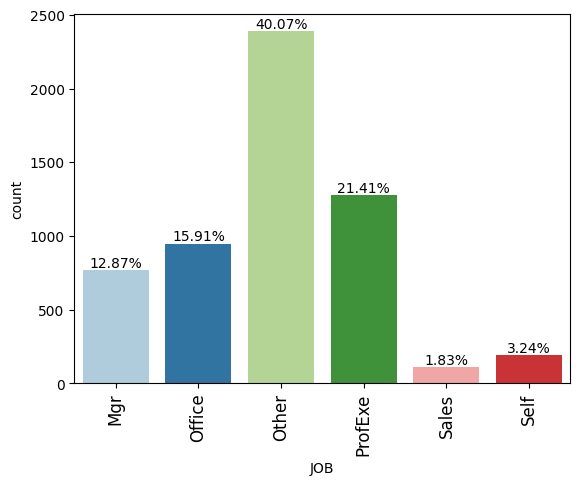

In [ ]:
barplot(data, 'JOB', perc = True)

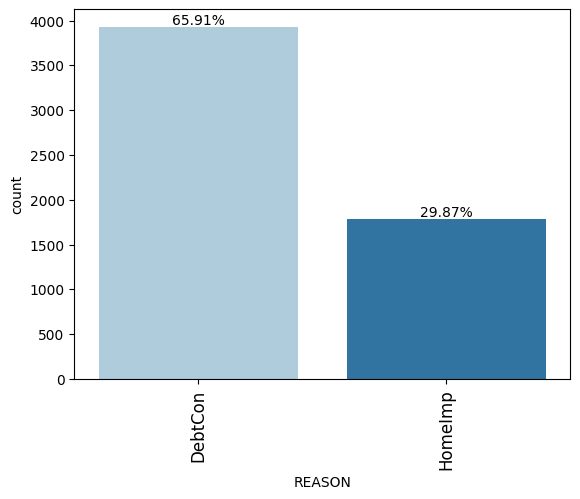

In [ ]:
barplot(data, 'REASON', perc = True)

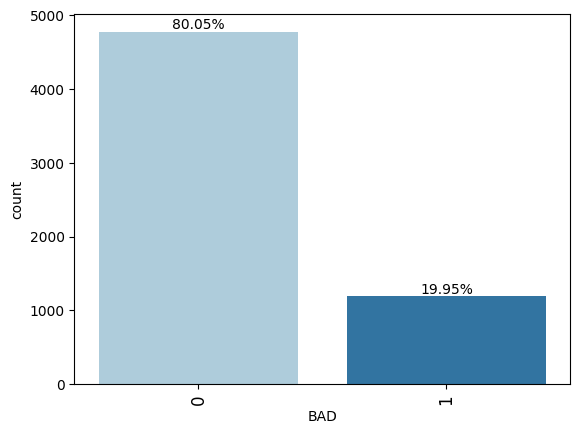

In [ ]:
barplot(data, 'BAD', perc = True)

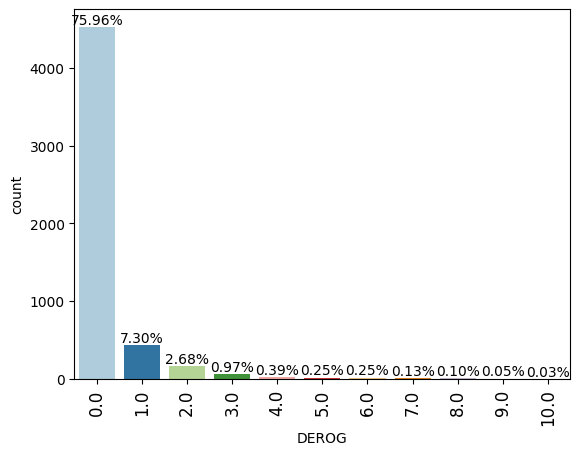

In [ ]:
barplot(data, 'DEROG', perc = True)

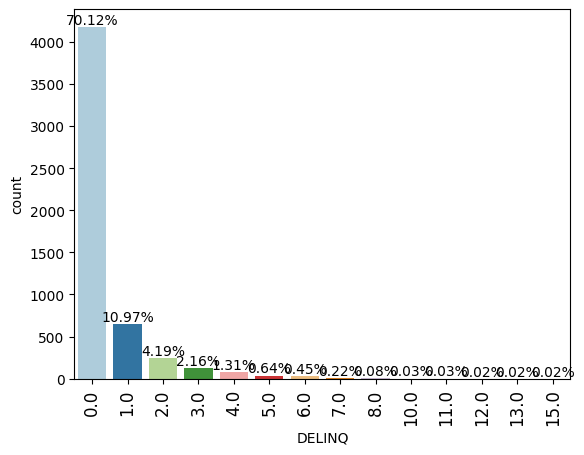

In [ ]:
barplot(data, 'DELINQ', perc = True)

**Observations From Barplots:**

- The **categorical variables, 'REASON', 'JOB' AND 'BAD' (target variable) give us the same conclusions as their percentage breakdown**.
  - About 2/3s of borrowers are requesting financing to consolidate debt while 1/3 of borrowers are using the finance to improve their home.
  - More than 40% of borrowers are workers in the "Other" category followed by "ProfExecutives" and "Office" workers. This variable is evenly spread out after the most common employment type.
  - ~80% of borrowers repaid their loan while ~20% defaulted on their loan.
- 'DEROG' and 'DELINQ' give us some interesting findings similiar to their histograms and boxplots.
  - **More than 75% of borrowers have no major derogatory reports**.
  - **More than 70% of borrowers have no delinquent lines of credit**.
  - This is a sign of good credit health among borrowers.

### **Bivariate Analysis**

In [ ]:
# Function to plot a stacked barplot for target variable vs categorical variable analysis
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

### Does the amount the original loan was approved for impact whether a client defaulted? Do applicants that default have drastically different mortgage amounts and current property values? What about debt to income ratios?

<Axes: xlabel='BAD', ylabel='LOAN'>

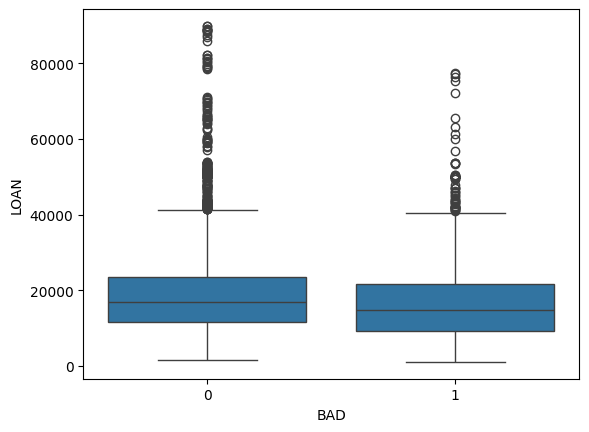

In [ ]:
sns.boxplot(data = data, x = 'BAD', y = 'LOAN')

<Axes: xlabel='BAD', ylabel='MORTDUE'>

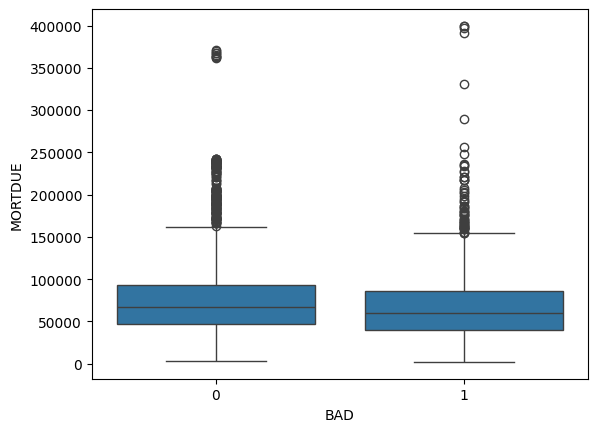

In [ ]:
sns.boxplot(data = data, x = 'BAD', y = 'MORTDUE')

<Axes: xlabel='BAD', ylabel='VALUE'>

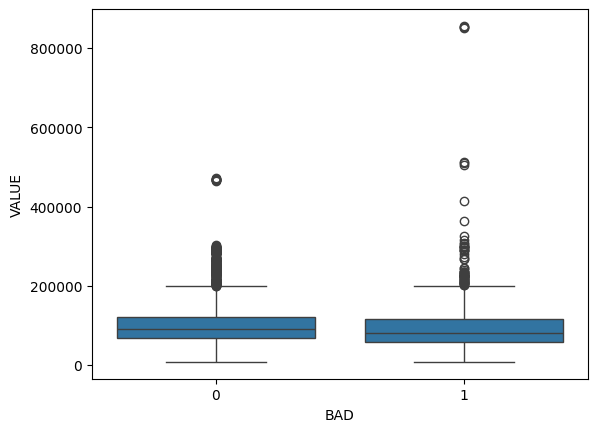

In [ ]:
sns.boxplot(data = data, x = 'BAD', y = 'VALUE')

<Axes: xlabel='BAD', ylabel='DEBTINC'>

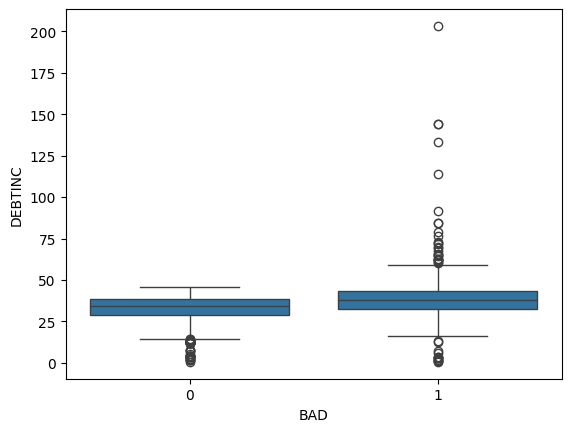

In [ ]:
sns.boxplot(data = data, x = 'BAD', y = 'DEBTINC')

**Observations:**

- In all 4 boxplots: **despite present outliers, we can tell that the amount of dollars of either variable doesn't showcase a different default result**.
  - Applicants who default don't have a significantly different loan amount compared to those who repay their loan.
  - Applicants who default don't have a significantly different mortgage amount compared to those who repay their loan.
  - Applicants who default don't have a significantly different current property value compared to those who repay their loan.
  - Applicants who default don't have a significantly different debt to income ratio compared to those who repay their loan.
  

<Axes: xlabel='LOAN', ylabel='MORTDUE'>

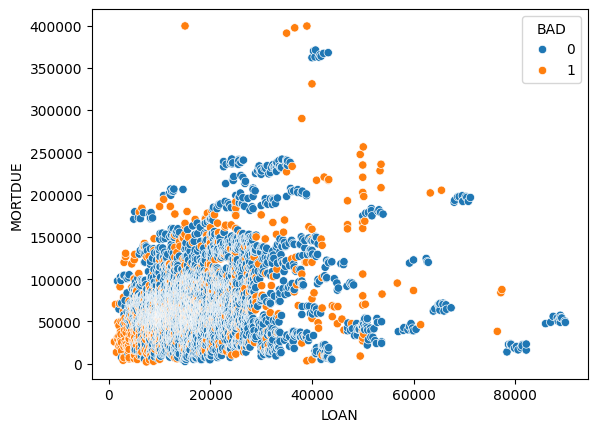

In [ ]:
sns.scatterplot(data = data, x = 'LOAN', y = 'MORTDUE', hue = 'BAD')

<Axes: xlabel='LOAN', ylabel='VALUE'>

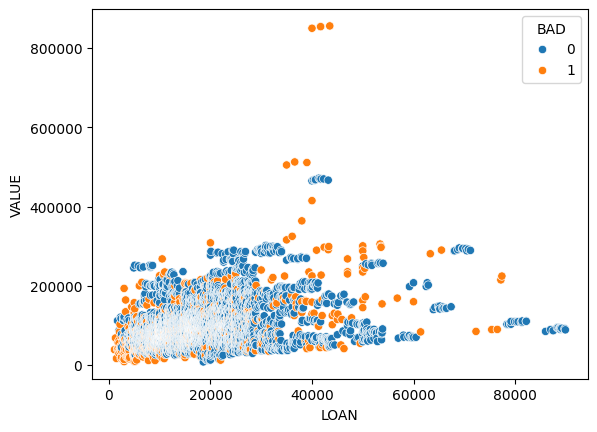

In [ ]:
sns.scatterplot(data = data, x = 'LOAN', y = 'VALUE', hue = 'BAD')

<Axes: xlabel='MORTDUE', ylabel='VALUE'>

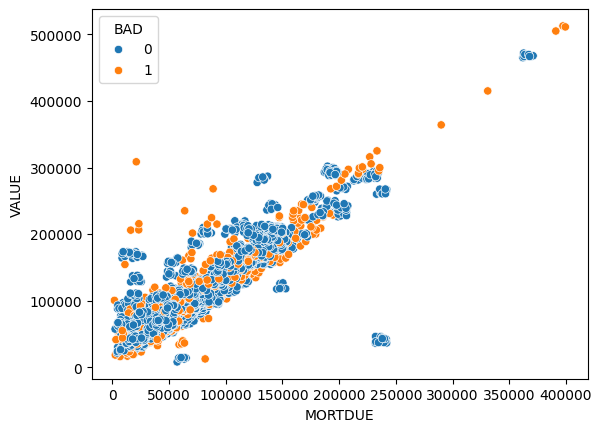

In [ ]:
sns.scatterplot(data = data, x = 'MORTDUE', y = 'VALUE', hue = 'BAD')

<Axes: xlabel='LOAN', ylabel='DEBTINC'>

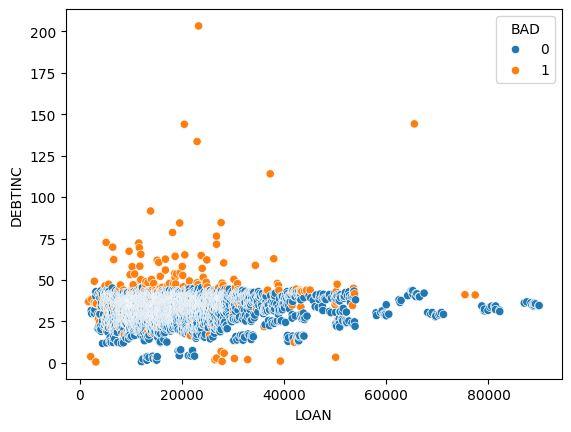

In [ ]:
sns.scatterplot(data = data, x = 'LOAN', y = 'DEBTINC', hue = 'BAD')

<Axes: xlabel='MORTDUE', ylabel='DEBTINC'>

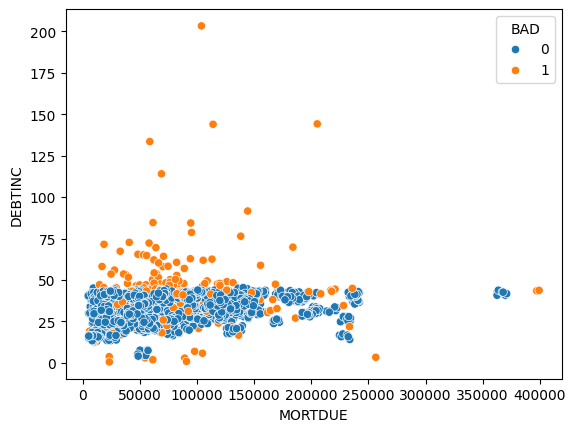

In [ ]:
sns.scatterplot(data = data, x = 'MORTDUE', y = 'DEBTINC', hue = 'BAD')

**Observations:**

- Out of the 'LOAN', 'MORTDUE', 'VALUE', and 'DEBTINC' variables, **only 'VALUE' and 'MORTDUE' have a relationship. Those two maintain a linear relationship: the higher the current property value, the higher the amount due on the mortage**. This isn't a perfect relationship, but it is logical among borrowers since both variables are proxies for the value of a home. Yet, neither variables tell us much about the likelihood of default or repayment.
- The variety of scatterplots reinforce this notion. **There is no pattern of mortage amounts, approved loan amounts, property values, or debt to income ratios follow to indicate if a default is more common**.


### Do clients that default have similiar reasons for their initial loan request?

BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780
------------------------------------------------------------------------------------------------------------------------


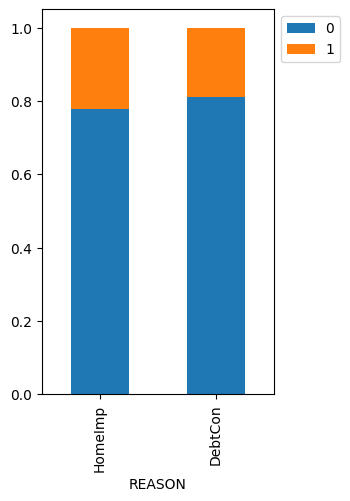

In [ ]:
stacked_barplot(data, 'REASON', 'BAD')

**Observations:**

- **There is no relationship between the 'REASON' variable and the proportion of applicants who defaulted on their loan**. Similiar percentages of borrowers who defaulted borrowed money for both debt consolidation and home improvement (80/20 split as in the entire dataset).


### How long on average are borrowers at their current job and does that job tell us anything about loan default rates?

BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


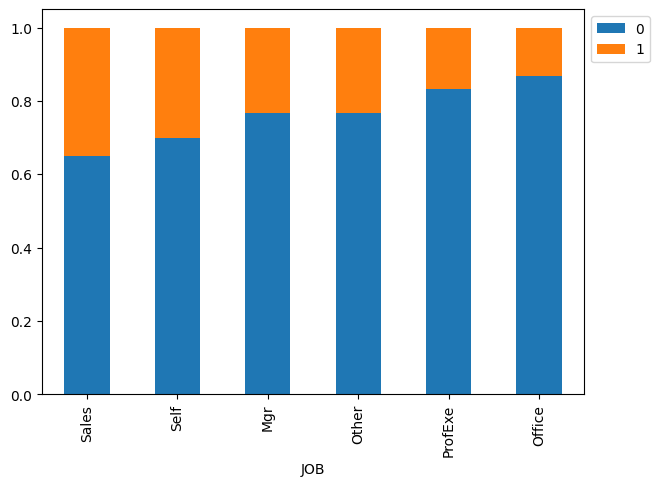

In [ ]:
stacked_barplot(data, 'JOB', 'BAD')

In [ ]:
data.groupby(['JOB'])['YOJ'].mean()

JOB
Mgr       9.319
Office    8.350
Other     9.459
ProfExe   8.752
Sales     6.802
Self      7.069
Name: YOJ, dtype: float64

**Observations:**

- **The employment of a borrower does give us some signals on his or her likelihood of defaulting on their loan**.
  - Borrowers working in "Sales" have the highest proportion of borrowers defaulting at around 35% while borrowers working in "Office" or "ProfExe" positions have the lowest proportion of borrowers defaulting (less than 20% default rate for both).  
- **The distribution of years at a borrower's present job 'YOJ' varies slightly
across the dataset**.
  - Borrowers who work in "Other" or as managers in the "Mgr" category are at their job longer than their peers with ~9.4 years.
  - Borrowers that work in "Sales" or are "Self" employed have been in their current role for ~7 years.

### How do the number of derogatory reports and delinquent lines of credit impact the loan default rate?

BAD        0     1   All
DELINQ                  
All     4263  1117  5380
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
------------------------------------------------------------------------------------------------------------------------


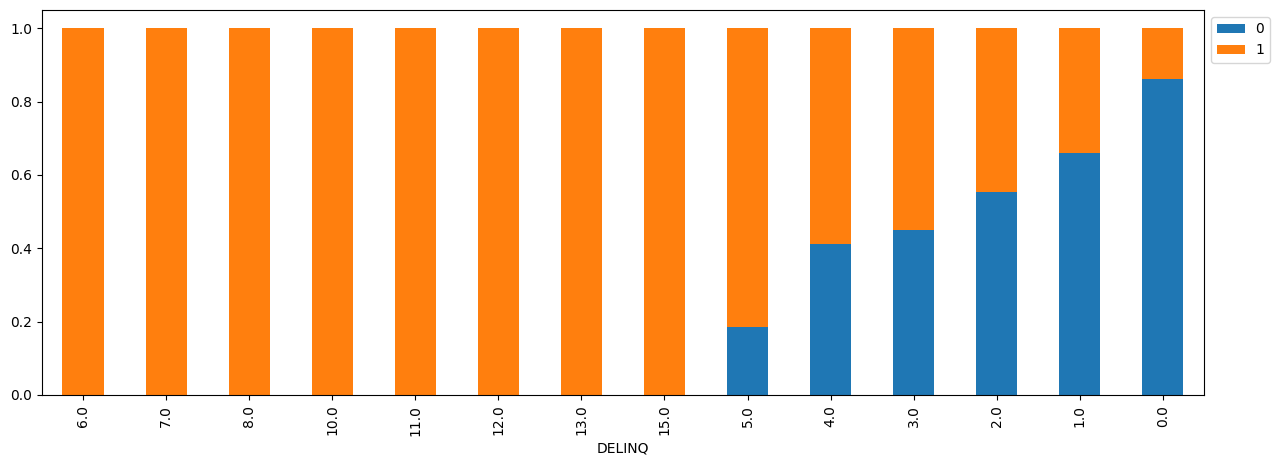

In [ ]:
stacked_barplot(data, 'DELINQ', 'BAD')

BAD       0     1   All
DEROG                  
All    4150  1102  5252
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
6.0       5    10    15
7.0       0     8     8
5.0       8     7    15
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
------------------------------------------------------------------------------------------------------------------------


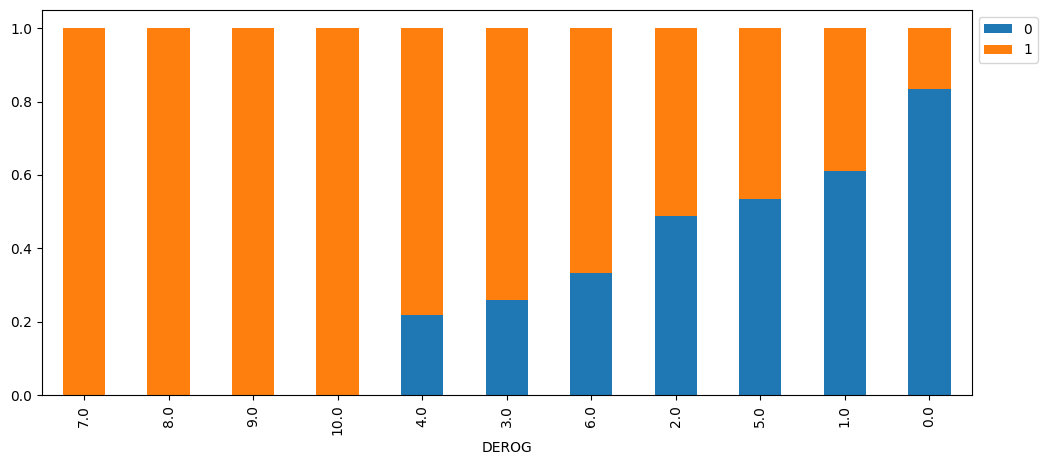

In [ ]:
stacked_barplot(data, 'DEROG', 'BAD')

**Observations:**

- 'DELINQ' and 'DEROG' variables do indicate a pattern in borrowers' loan default rates.
  - **There is a higher loan default rate in borrowers with more delinquent credit lines tied to his or her profile**. Borrowers with more than 6 delinquent credit lines all defaulted on their loans.
  - **There is a higher loan default rate in borrowers with more major derogatory reports tied to his or her profile**. Borrowers with more than 7 major derogatory reports all defaulted on their loans.

### **Multivariate Analysis**

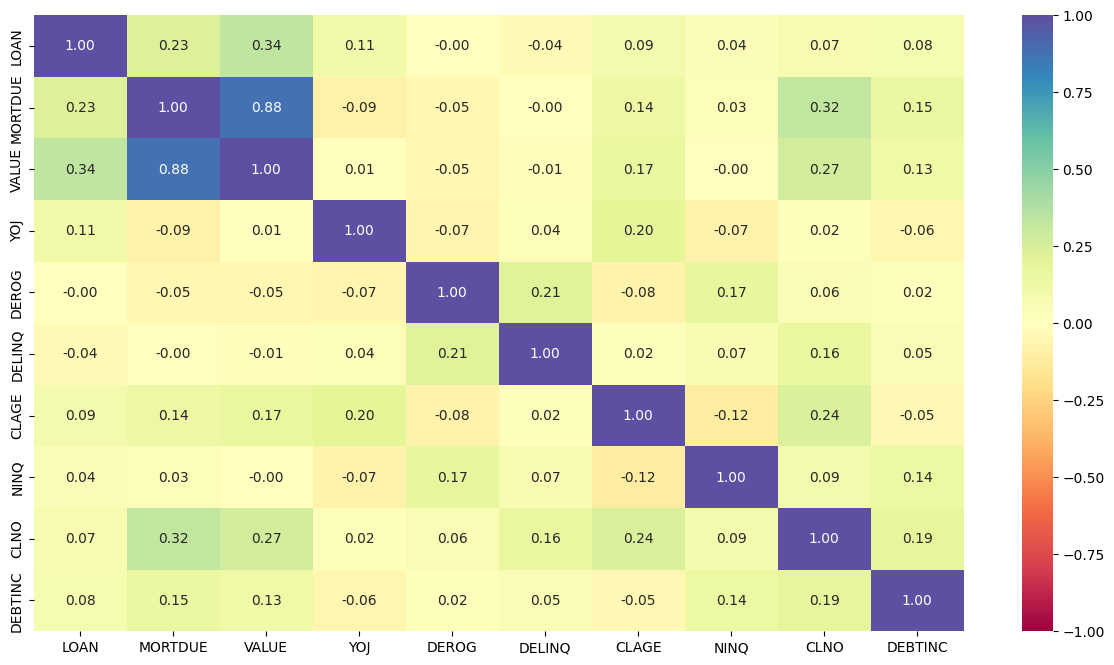

In [ ]:
# Finding the correlation between various columns of the dataset
num_cols = list(data.select_dtypes("number").columns)

plt.figure(figsize = (15,8))
sns.heatmap(data[num_cols].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

plt.show()

**Observations From Heatmap:**

- The **highest (most positive) correlation between any two numerical variables belongs to 'MORTDUE' and 'VALUE'. This may indicate that the lower or higher one variable, the lower or higher the other variable**.
- Other relationships that have some positive correlation include:
  - **'VALUE' and 'LOAN'**: may signify a relationship between approved loan amount and current value of the property. A higher loan amount probably means a high current value of the property which makes sense since the house needs to be paid off.
  - **'DELINQ' and 'DEROG'**: may signify a relationship between derogatory reports and dedlinquent lines of credit
  - **'MORTDUE' and 'CLNO'**: may signify a relationship between the amount due on the existing mortage and number of credit lines. The higher the amount due on the existing mortgage the more lines of credit that may be needed to pay that large sum off.
  - **'CLNO' and 'CLAGE'**: may signify a relationship between the number of existing credit lines and the age of the oldest credit line in months. The more credit lines a borrower might have the older his or hers existing credit lines become.
- There **aren't any relationships with strong negative correlation** based on the matrix.

## Treating Outliers

We saw plenty of outliers in numerical variables while conducting univariate analysis. Let's treat them.

In [ ]:
# Function to convert outliers in one numerical variable into the minimum (lower whisker) and maximum (upper whisker) values
def convertcol_outliers(df, col):

    Q1 = df[col].quantile(q = .25)                                              # define Q1
    Q3 = df[col].quantile(q = .75)                                              # define Q3
    IQR = Q3 - Q1                                                               # define IQR range
    Lower_Whisker = Q1 - 1.5*IQR                                                # define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR                                                # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                    # convert very small (0.0 - 0.25) values to the Lower_Whisker value
                                                                                # convert very large (0.75 - 1.0) values to the Upper_Whisker value
    return df

In [ ]:
# Function to convert outliers in all numerical variables
def convertall_outliers(df, num_cols):

    for col in num_cols:                                                        # run thru all numerical cols
        df = convertcol_outliers(df, col)                                       # convert outliers based on the individual column function

    return df

In [ ]:
# Converting all outliers in dataset
df = data.copy()
df_new = convertall_outliers(df, num_cols)

In [ ]:
# Viewing new df with converted outliers
df_new

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000,39025.000,HomeImp,Other,10.500,0.000,0.000,94.367,1.000,9.000,NaN
1,1,1300,70053.000,68400.000,HomeImp,Other,7.000,0.000,0.000,121.833,0.000,14.000,NaN
2,1,1500,13500.000,16700.000,HomeImp,Other,4.000,0.000,0.000,149.467,1.000,10.000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.000,112000.000,HomeImp,Office,3.000,0.000,0.000,93.333,0.000,14.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.000,90185.000,DebtCon,Other,16.000,0.000,0.000,221.809,0.000,16.000,36.112
5956,0,41600,54576.000,92937.000,DebtCon,Other,16.000,0.000,0.000,208.692,0.000,15.000,35.860
5957,0,41600,54045.000,92924.000,DebtCon,Other,15.000,0.000,0.000,212.280,0.000,15.000,35.557
5958,0,41600,50370.000,91861.000,DebtCon,Other,14.000,0.000,0.000,213.893,0.000,16.000,34.341


In [ ]:
# Confirming conversions with statistical summary
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.000,18051.896,9252.565,1100.000,11100.000,16300.000,23300.000,41600.000
MORTDUE,5442.000,71566.094,37203.654,2063.000,46276.000,65019.000,91488.000,159306.000
VALUE,5848.000,98538.058,45070.800,8000.000,66075.500,89235.500,119824.250,200447.375
YOJ,5445.000,8.873,7.431,0.000,3.000,7.000,13.000,28.000
DEROG,5252.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DELINQ,5380.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CLAGE,5652.000,178.636,80.495,0.000,115.117,173.467,231.562,406.231
NINQ,5450.000,1.093,1.373,0.000,0.000,1.000,2.000,5.000
CLNO,5738.000,21.033,9.420,0.000,15.000,20.000,26.000,42.500
DEBTINC,4693.000,33.682,7.135,14.345,29.140,34.818,39.003,53.798


**Observations:**

- **Outliers have been treated accordingly**. We chose this method to keep the interpretability and underlying analysis of the data in the same ballpark as the original data.

## Treating Missing Values

In [ ]:
# Finding % of missing values for each column
df_new.isnull().sum()/df_new.shape[0]

BAD       0.000
LOAN      0.000
MORTDUE   0.087
VALUE     0.019
REASON    0.042
JOB       0.047
YOJ       0.086
DEROG     0.119
DELINQ    0.097
CLAGE     0.052
NINQ      0.086
CLNO      0.037
DEBTINC   0.213
dtype: float64

In [ ]:
# Treating missing values in categorical columns with mode
cat_df = df_new.select_dtypes('category').columns.tolist()    # selecting categorical columns
for col in cat_df:
    mode = df_new[col].mode()[0]
    df_new[col].fillna(df_new[col].mode()[0], inplace = True) # filling columns with mode

In [ ]:
# Treating missing values in numerical columns with median
df[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']] = df[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']].fillna(df[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']].median())

In [ ]:
# Confirming the eradication of missing values
df_new.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
# Checking the df
df_new.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000,39025.000,HomeImp,Other,10.500,0.000,0.000,94.367,1.000,9.000,34.818
1,1,1300,70053.000,68400.000,HomeImp,Other,7.000,0.000,0.000,121.833,0.000,14.000,34.818
2,1,1500,13500.000,16700.000,HomeImp,Other,4.000,0.000,0.000,149.467,1.000,10.000,34.818
3,1,1500,65019.000,89235.500,DebtCon,Other,7.000,0.000,0.000,173.467,1.000,20.000,34.818
4,0,1700,97800.000,112000.000,HomeImp,Office,3.000,0.000,0.000,93.333,0.000,14.000,34.818


In [ ]:
# Further confirming the eradication of missing values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [ ]:
# Analyzing the updated cat data
df_new.describe(include = ['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5960,2,DebtCon,4180
JOB,5960,6,Other,2667


In [ ]:
# Analyzing the updated num data
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.000,18051.896,9252.565,1100.000,11100.000,16300.000,23300.000,41600.000
MORTDUE,5960.000,70997.068,35597.710,2063.000,48139.000,65019.000,88200.250,159306.000
VALUE,5960.000,98363.244,44663.106,8000.000,66489.500,89235.500,119004.750,200447.375
YOJ,5960.000,8.711,7.122,0.000,3.000,7.000,12.000,28.000
DEROG,5960.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DELINQ,5960.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CLAGE,5960.000,178.369,78.396,0.000,117.371,173.467,227.143,406.231
NINQ,5960.000,1.085,1.313,0.000,0.000,1.000,2.000,5.000
CLNO,5960.000,20.994,9.245,0.000,15.000,20.000,26.000,42.500
DEBTINC,5960.000,33.924,6.348,14.345,30.763,34.818,37.950,53.798


In [ ]:
# Analyzing the original num data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.000,18607.970,11207.480,1100.000,11100.000,16300.000,23300.000,89900.000
MORTDUE,5442.000,73760.817,44457.609,2063.000,46276.000,65019.000,91488.000,399550.000
VALUE,5848.000,101776.049,57385.775,8000.000,66075.500,89235.500,119824.250,855909.000
YOJ,5445.000,8.922,7.574,0.000,3.000,7.000,13.000,41.000
DEROG,5252.000,0.255,0.846,0.000,0.000,0.000,0.000,10.000
DELINQ,5380.000,0.449,1.127,0.000,0.000,0.000,0.000,15.000
CLAGE,5652.000,179.766,85.810,0.000,115.117,173.467,231.562,1168.234
NINQ,5450.000,1.186,1.729,0.000,0.000,1.000,2.000,17.000
CLNO,5738.000,21.296,10.139,0.000,15.000,20.000,26.000,71.000
DEBTINC,4693.000,33.780,8.602,0.524,29.140,34.818,39.003,203.312


**Observations:**

- **Missing values have been treated accordingly**. We chose a simple method that fills in the missing values without changing the overarching data.

## **Important Insights from EDA**

The most important observations and insights from the data based on the EDA performed are as follows:

- Out of 13 columns, 2 columns: ('REASON' and 'JOB') are categorical and the rest are numerical.
- Most borrowers are using financing for debt consolidation while others are using it to conduct home improvements.
- 40% of borrowers work jobs in the "Other" category while the rest of the borrowers work in different environments. After treating for missing values, more borrowers are in the "Other" category.
- Employees in "Sales" or "Self" employed tend to default the most while "Office" default the least based on our data.
- The number of major derogatory reports and delinquent credit lines look to be a good indicator of default rate. All borrowers after a certain threshold valuefor reports/lines have defaulted. However, majority of borrowers have 0 major derogatory reports and 0 delinquent lines of credit.
- Many of the numerical columns had outliers that we treated. Most of the data was right skewed and has since become closer to normal after removing outliers and adding in missing values.

## **Model Building**


### Data Preprocessing

In [ ]:
# Separating independent variables and the target variable status
x = df_new.drop('BAD', axis = 1)
y = df_new['BAD']

In [ ]:
# Creating dummy variables to encode the categorical independent variables (target is already in the correct format)
x = pd.get_dummies(x, drop_first = True)

In [ ]:
# Checking the data after handling categorical data
x

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.000,39025.000,10.500,0.000,0.000,94.367,1.000,9.000,34.818,True,False,True,False,False,False
1,1300,70053.000,68400.000,7.000,0.000,0.000,121.833,0.000,14.000,34.818,True,False,True,False,False,False
2,1500,13500.000,16700.000,4.000,0.000,0.000,149.467,1.000,10.000,34.818,True,False,True,False,False,False
3,1500,65019.000,89235.500,7.000,0.000,0.000,173.467,1.000,20.000,34.818,False,False,True,False,False,False
4,1700,97800.000,112000.000,3.000,0.000,0.000,93.333,0.000,14.000,34.818,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,41600,57264.000,90185.000,16.000,0.000,0.000,221.809,0.000,16.000,36.112,False,False,True,False,False,False
5956,41600,54576.000,92937.000,16.000,0.000,0.000,208.692,0.000,15.000,35.860,False,False,True,False,False,False
5957,41600,54045.000,92924.000,15.000,0.000,0.000,212.280,0.000,15.000,35.557,False,False,True,False,False,False
5958,41600,50370.000,91861.000,14.000,0.000,0.000,213.893,0.000,16.000,34.341,False,False,True,False,False,False


In [ ]:
# Scaling the data to ensure standardization (our numerical data has large loan dollar amounts, ages in years, and ratios for debt to income)
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

In [ ]:
# Splitting the dataset into train and test datasets
# Sampling data using stratification to ensure the 80/20 split of repayment/default in target variable
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, shuffle = True, random_state = 1, stratify = y)

In [ ]:
# Checking the shape of the train and test data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4172, 16) (4172,) (1788, 16) (1788,)


In [ ]:
# Confirming the 70/30 train/test split
print(x_train.shape[0]/len(x))
print(x_test.shape[0]/len(y))
print(y_train.shape[0]/len(x))
print(y_test.shape[0]/len(y))

0.7
0.3
0.7
0.3


**Observations:**

- We have transformed the categorical data into numerical data for accurate processing of the variables and predictions during model testing and evaluation.
- We **scaled our data to create even fitting numerical data so our our model's interpretability is straightforward**.
- Train/Test split is observing a 70/30 breakdown with proper assortment of target and predictor variables in x/y data.

### Model Goals & Outline

What do we want to get out of our modeling?

- The best model is what the one that does what best? Based on our 'BAD' target variable, we know that:
    - If a borrower is rejected (not accepted), the borrower is classified as 1.
    - If a borrower isn't rejected (accepted), the borrower is classified as 0.

But what if we get Wrong Predictions?

- Due to errors, model under/overfitting, wrong predictions are possible. Let's decide how to analyze them.
- Correct Predictions:
    - True Positive, i.e., the borrower is rejected (1) and the model also predicted that the borrower would be rejected (1)
    - True Negative, i.e., the borrower isn't rejected (0) and the model also predicted that the borrower wouldn't get rejected (0)
- Incorrect Predictions:
    - False Negative, i.e., the borrower is rejected (1) but the model predicted that the borrower wouldn't be rejected (0)
    - False Positive, i.e., the borrower isn't rejected (0) but the model predicted that the borrower would be rejected (1)

What evaluation metric to use based on the above possibilities?

- The bank will **lose the loaned amount of money on a borrower if the model designates a borrower as a False Negative**. This borrower will have came into the bank for a loan and would have been granted the loan based on the model. However, this borrower would have defaulted.
- The bank will **lose potential interest revenue from a borrower if the model designates a borrower as a False Positive**. This borrower will have came into the bank for a loan but because the model predicted he/she would default, the borrower was rejected.

**The loss of potential revenue would be a great missed opportunity for the bank because of the model's misclassification. But the loss of large sums of money in the form of defaulted loans is a much bigger misclassification to the bank. It is the bank's goal to analyze and find clients to lend money to. We don't want to guide them in the wrong direction where they grant a loan to someone who may eventually default. To minimize this misclassification of False Negatives, the Recall metric will be used**.

In [ ]:
# Creating metrics function to summarize classification model results
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Rejected', 'Rejected'], yticklabels = ['Not Rejected', 'Rejected' ])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### **Logistic Regression**

In [ ]:
# Fitting the logistic reg model on training data
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3340
           1       0.64      0.09      0.15       832

    accuracy                           0.81      4172
   macro avg       0.73      0.54      0.52      4172
weighted avg       0.78      0.81      0.74      4172



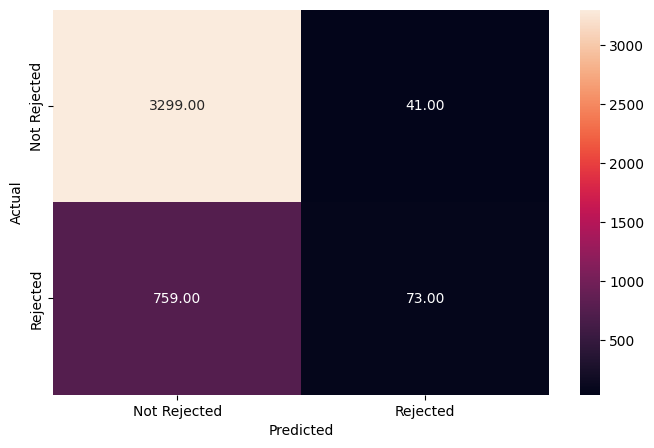

In [ ]:
# Analyzing performance on train data
y_train_pred = lg.predict(x_train)
metrics_score(y_train, y_train_pred)

**Observations:**

- The **recall scores for borrowers that repay their loan is predicted well but this model does not do a good job at find borrowers who are at the risk of defaulting** (recall at 9%).
- Overall accuracy of the model seems good but recall score needs to be better.

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1431
           1       0.68      0.08      0.15       357

    accuracy                           0.81      1788
   macro avg       0.75      0.54      0.52      1788
weighted avg       0.79      0.81      0.74      1788



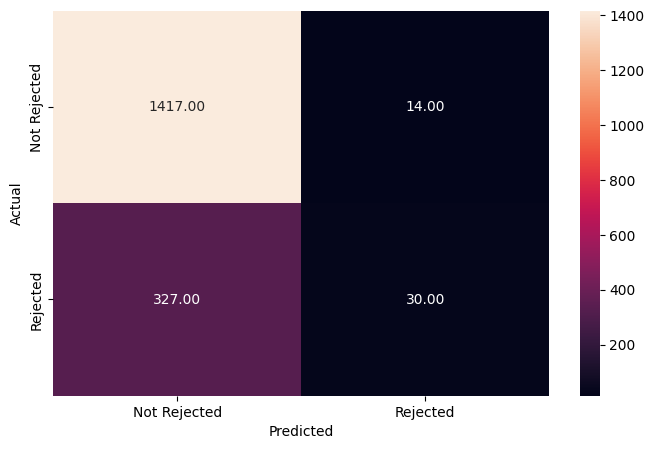

In [ ]:
# Analyzing performance on test data
y_test_pred = lg.predict(x_test)
metrics_score(y_test, y_test_pred)

**Observations:**

- Similiar to the training data, **this model is not good at identifying borrowers at high risk iof defaulting. The recall score is 8%**.

In [ ]:
# Checking variable importance thru coefficients
cols = x_scaled.columns
coef_lg = lg.coef_

pd.DataFrame(coef_lg, columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,0.418
NINQ,0.292
REASON_HomeImp,0.149
JOB_Sales,0.083
JOB_Self,0.072
VALUE,0.055
CLNO,0.047
DEROG,0.000
DELINQ,0.000
YOJ,-0.055


**Observations:**

- The features that **most positively affect the target variable of default are 'DEBTINC' and 'NINQ'**.  
- The features that **most negatively affect the target variable of default are 'CLAGE' and 'MORTDUE'**.  

Let's convert the log to exp so we can better interpret a borrower's chance at defaulting on a loan.

In [ ]:
# Taking out the log of odds by applying exp and getting just the odds
odds = np.exp(lg.coef_[0])

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
DEBTINC,1.518
NINQ,1.339
REASON_HomeImp,1.160
JOB_Sales,1.087
JOB_Self,1.074
VALUE,1.057
CLNO,1.048
DEROG,1.000
DELINQ,1.000
YOJ,0.946


**Observations:**

- A borrower that defaults has a
  - 50% higher chance of defaulting if he or she has a higher debt to income ratio than a lower debt to income ratio.
  - 34% higher chance of defaulting if he or she has a large number of recent credit inquiries instead of a small number if credit inquiries.

- A borrower that doesn't default has a
  - ~20% less chance of defaulting if he or she has a smaller amount on existing mortage to pay off.

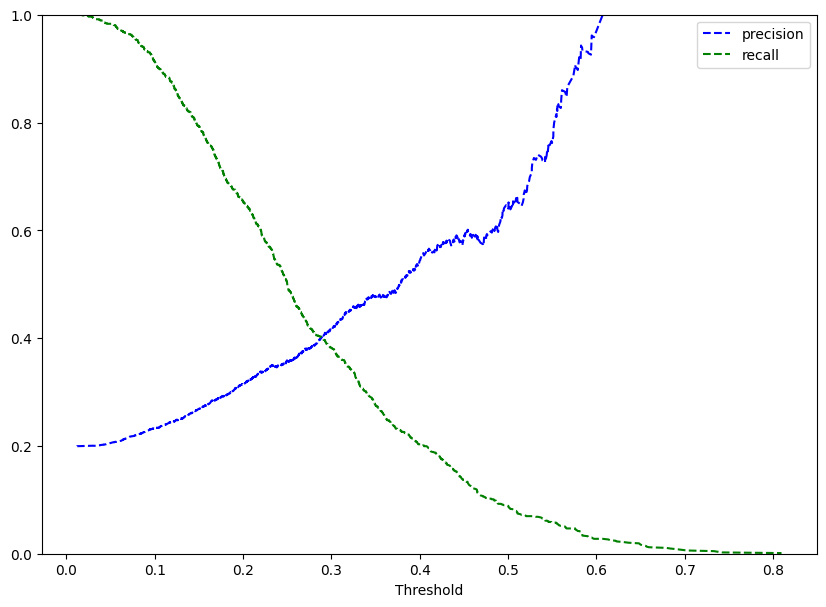

In [ ]:
# Finding the optimal threshold using the precision/recall curve to make our model perform better
y_scores_lg = lg.predict_proba(x_train)
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plotting values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper right')
plt.ylim([0, 1])

plt.show()

**Observations:**

- Based on the curve, the optimal threshold where precision and recall meet right before 0.30. **We will go with 0.29 as a our optimal threshold value**.

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3340
           1       0.40      0.40      0.40       832

    accuracy                           0.76      4172
   macro avg       0.63      0.63      0.63      4172
weighted avg       0.76      0.76      0.76      4172



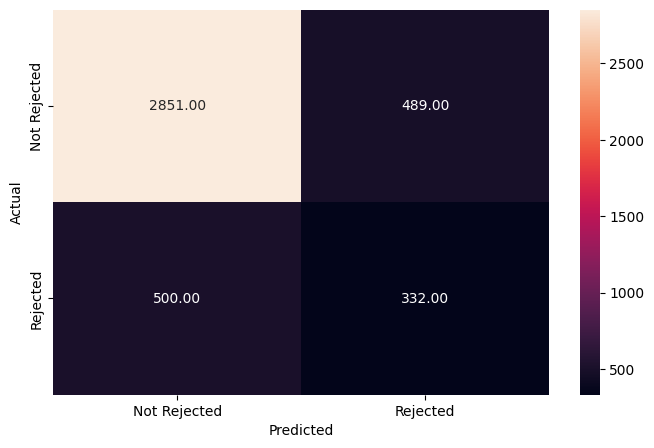

In [ ]:
# Checking the performance on train data with optimal threshold
optimal_threshold1 = .29
y_train_pred = lg.predict_proba(x_train)
metrics_score(y_train, y_train_pred[:, 1] > optimal_threshold1)

**Observations:**

- The model performance has improved. **The recall has increased significantly for class 1 from 9% to 40%**. Let's see if there's improvement in the test data.

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1431
           1       0.41      0.39      0.40       357

    accuracy                           0.77      1788
   macro avg       0.63      0.63      0.63      1788
weighted avg       0.76      0.77      0.76      1788



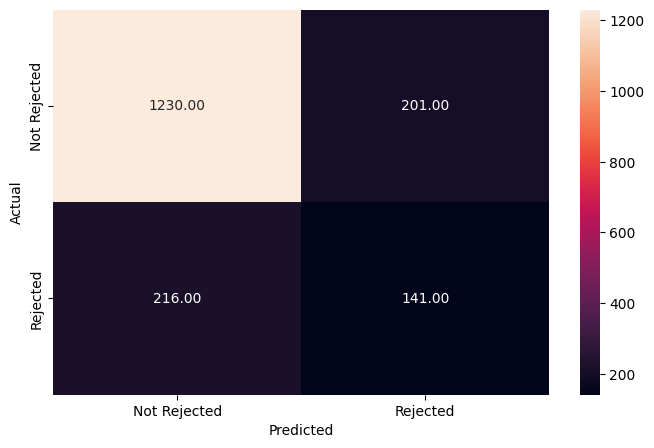

In [ ]:
# Checking the performance on test data with optimal threshold
optimal_threshold1 = .29
y_test_pred = lg.predict_proba(x_test)
metrics_score(y_test, y_test_pred[:, 1] > optimal_threshold1)

**Observations:**

- The **performance on the test data is quite similiar to that of the train data. The recall has gone up from 9% to 39% and precision has decreased as expected to maximize recall**. Recall score is still low so we will see how decision trees may help us.


### **Decision Tree Classifier**

Let's build the initial decision tree:

In [ ]:
# Fitting the DT classifier on train data
dtc = DecisionTreeClassifier(random_state = 1)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



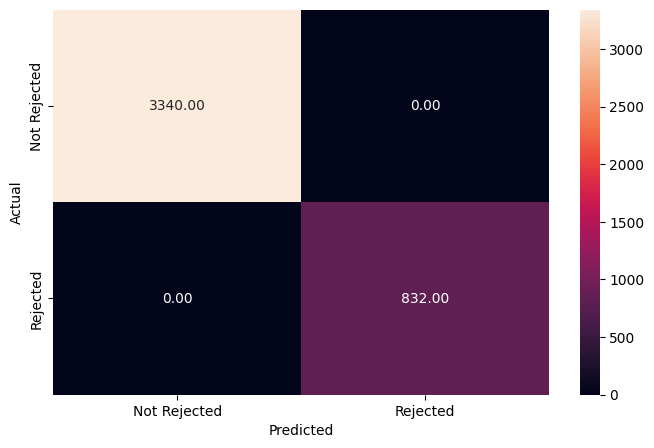

In [ ]:
# Analyzing performance on train data of original model
y_train_pred1 = dtc.predict(x_train)
metrics_score(y_train, y_train_pred1)

**Observations:**

- The model seems to overfit to the training data as **all metrics are perfect scores and there are no errors**. Let's confirm the overfitting below.

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1431
           1       0.63      0.57      0.60       357

    accuracy                           0.85      1788
   macro avg       0.76      0.74      0.75      1788
weighted avg       0.84      0.85      0.84      1788



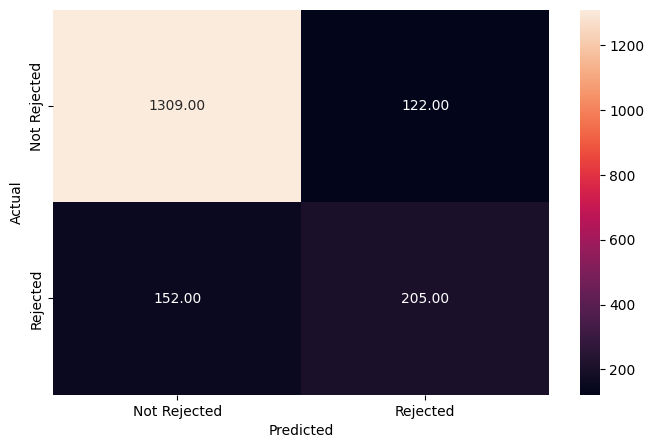

In [ ]:
# Analyzing performance on test data of original model
y_test_pred1 = dtc.predict(x_test)
metrics_score(y_test, y_test_pred1)

**Observations:**

- The model has **definitely overfit the training data and is not able to perform well when classifying the testing data. Recall score of 57% is higher than the 40% of logistic regression before %** but let's see what improvements we can make using hyperparameter tuning.

### **Decision Tree - Hyperparameter Tuning**

In [ ]:
# Choosing the type of classifier
# Inverting class weights to the opposite of original data for primary class importance
dtc_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.2, 1: 0.8})

# Listing parameters to choose from for grid search
parameters = {'max_depth': np.arange(2, 16, 2),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 15, 20, 25]
             }

# Comparing parameter combinations through scoring with class 1 recall score
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
grid_obj = GridSearchCV(dtc_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Setting the classifier to the best combination of parameters
dtc_tuned = grid_obj.best_estimator_

# Fitting the best possible algorithm to the data
dtc_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=12, min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3340
           1       0.56      0.86      0.68       832

    accuracy                           0.84      4172
   macro avg       0.76      0.85      0.79      4172
weighted avg       0.88      0.84      0.85      4172



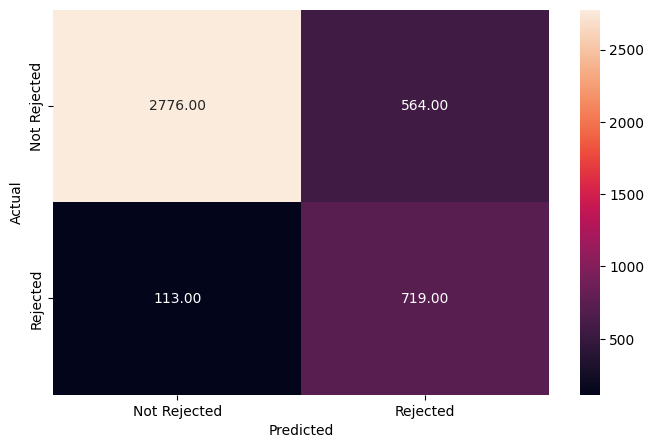

In [ ]:
# Analyzing performance on train data of tuned model
y_train_pred2 = dtc_tuned.predict(x_train)
metrics_score(y_train, y_train_pred2)

**Observations:**

- The model has given **poorer results compared to the original performance along the training data**. This is on par with what **we expect since we want to sacrifice some predictability on the train data for more robust predictability along the test data**.
- The **recall score for class 1 at 86% is the best we have seen**. Let's see if our test data gives us similiar results.

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      1431
           1       0.54      0.78      0.64       357

    accuracy                           0.82      1788
   macro avg       0.74      0.81      0.76      1788
weighted avg       0.86      0.82      0.84      1788



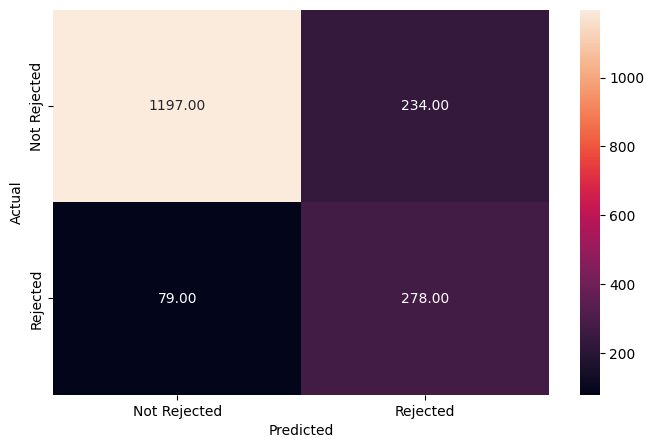

In [ ]:
# Analyzing performance on test data of tuned model
y_test_pred2 = dtc_tuned.predict(x_test)
metrics_score(y_test, y_test_pred2)

**Observations:**

- Performance on the test data has improved relative to original decision tree. but performs weaker than the training data. There are **less misclassifications and even though the metric scores are slightly lower in the test data, it is a good sign that the model is fitting well on both data sets**.
- **Recall of 0.78 seems indicates a healthy well-performing, model**.
- Precision has gone down for test data compared to train data and the original tree model so the bank will have to be cautious - loss of income is possible since able borrowers are being rejected.

Let's explore the tuned decision tree visually:

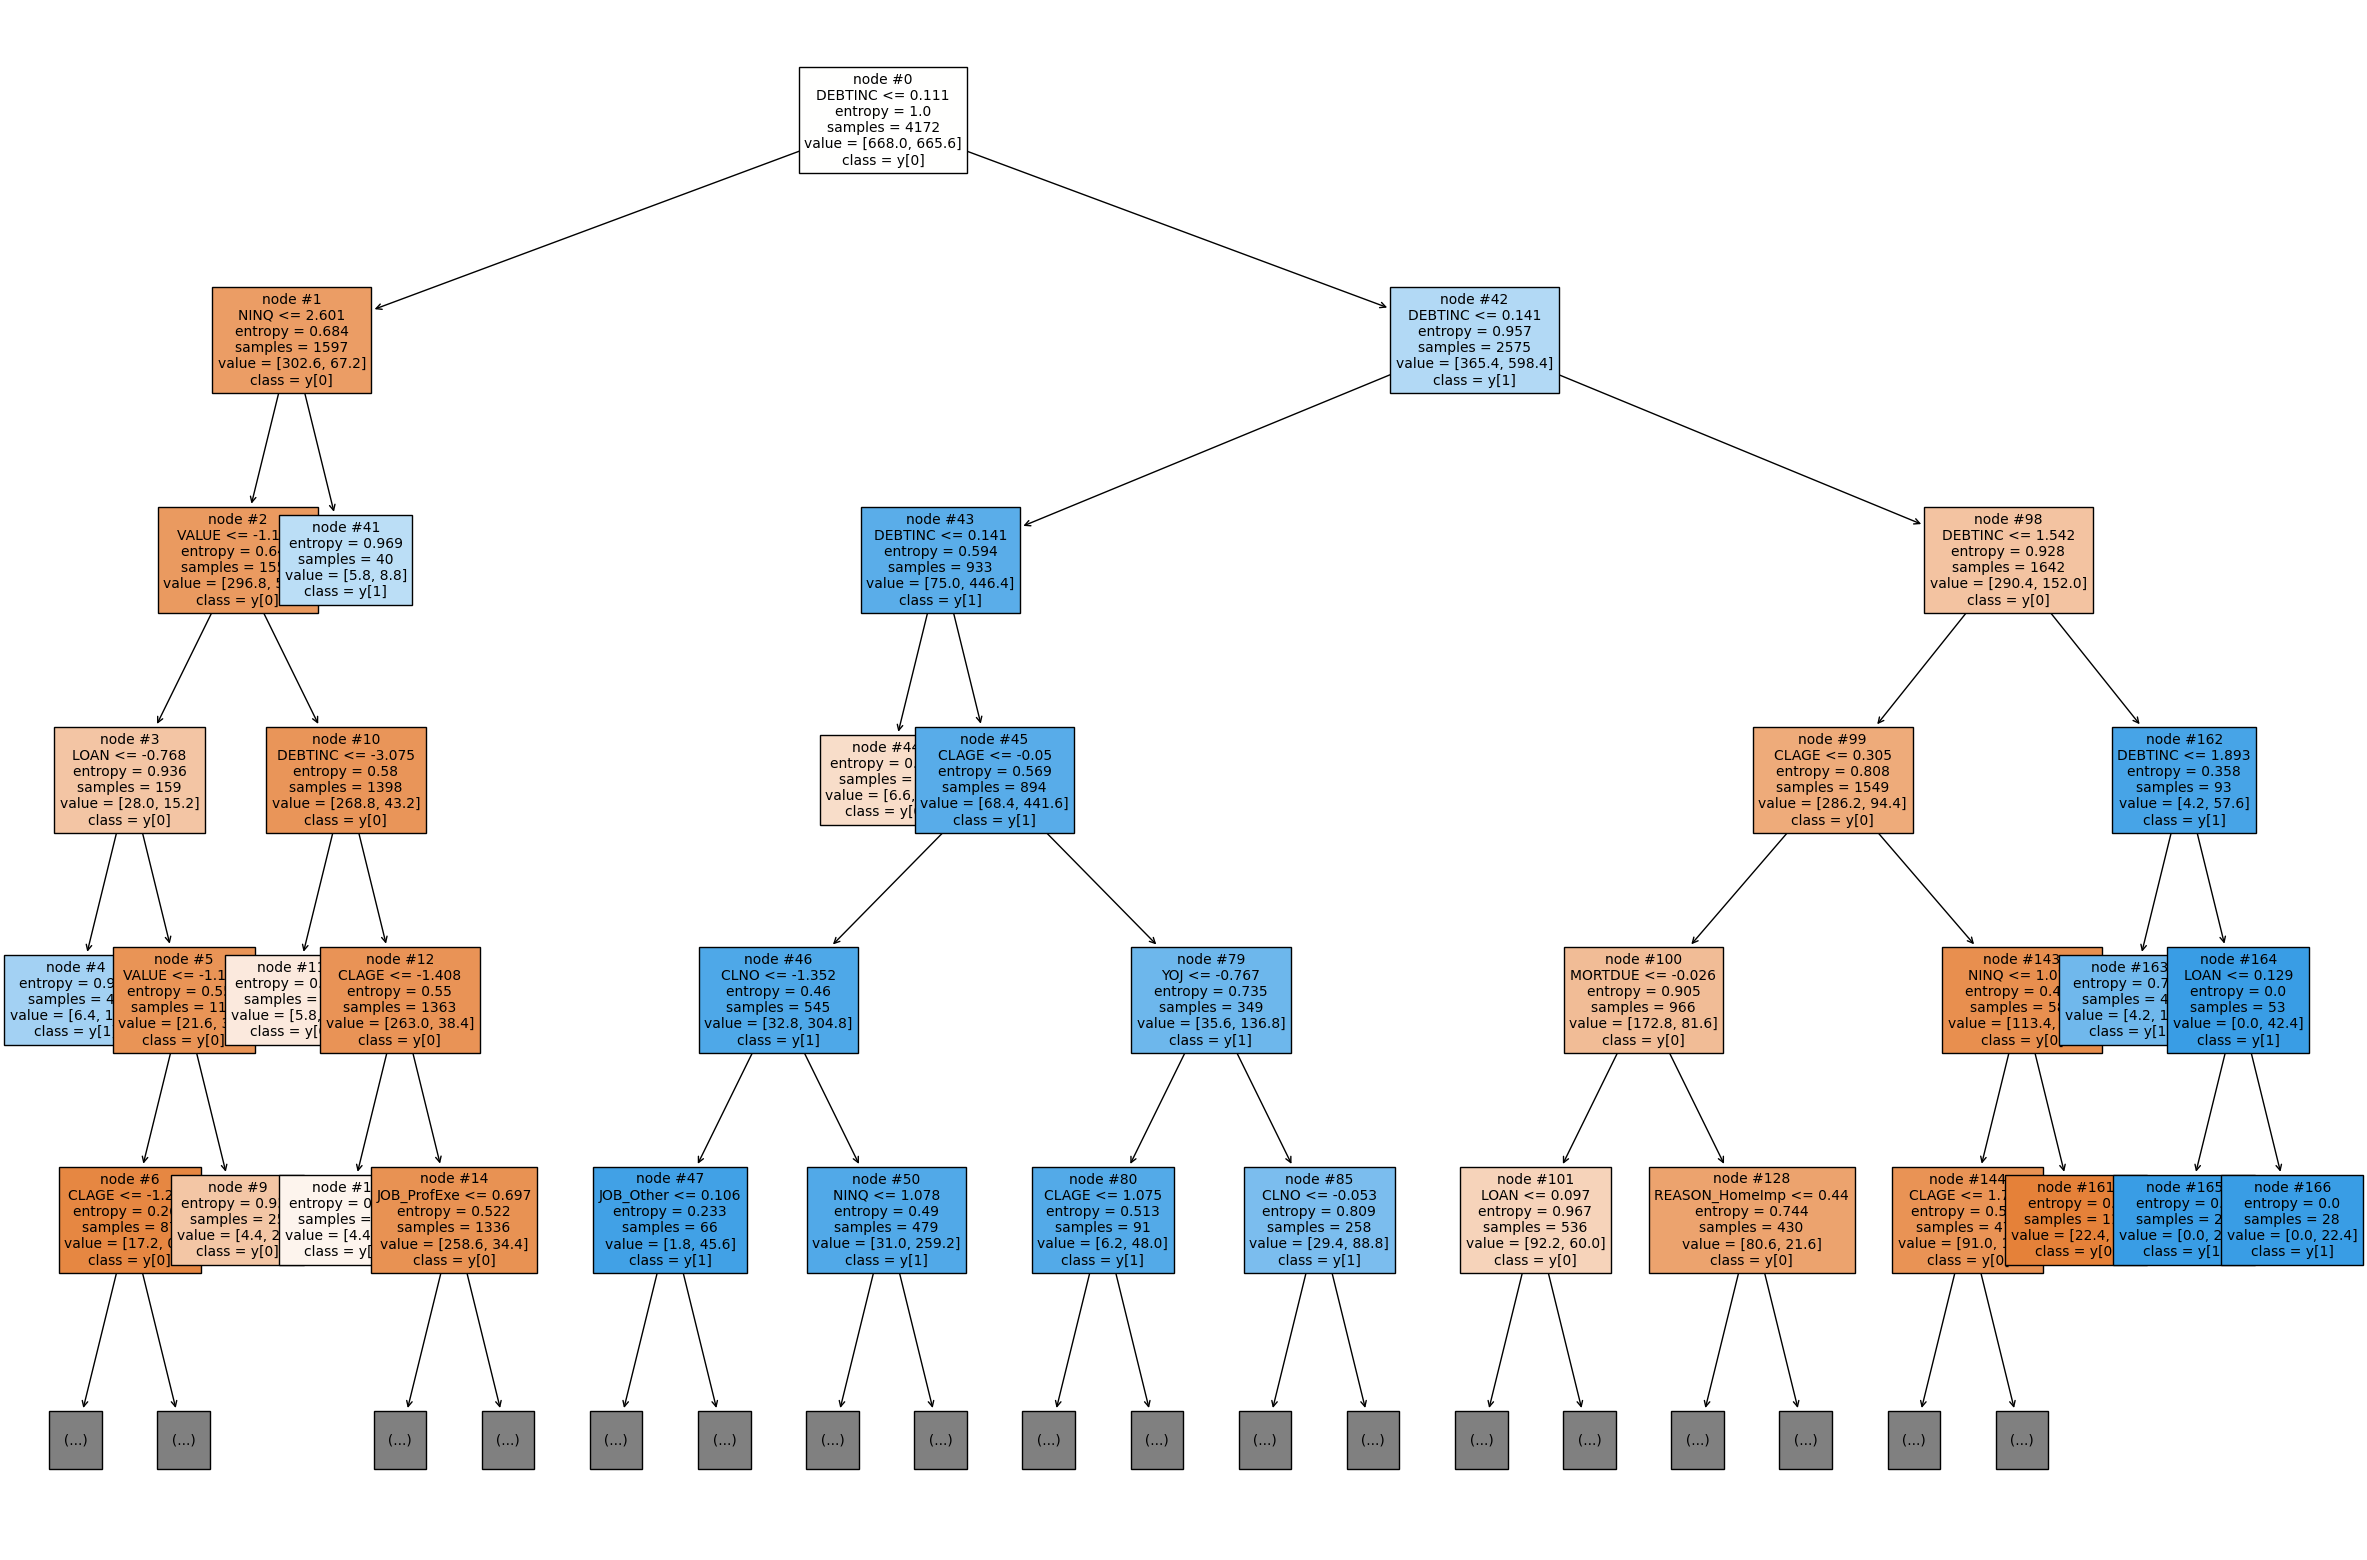

In [ ]:
# Plotting the dt
features = list(x.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dtc_tuned, max_depth = 5, feature_names = features, filled = True, fontsize = 10, node_ids = True, class_names = True)
plt.show()

**Observations:**

- Legend
  - Blue leaves are defaulted borrowers and orange borrowers repaid their loan.
  - Color darkness is determined through the number of leads that fall into each leaf.

- **A borrowers debt to income ratio ('DEBTINC') and number of recent credit inquiries ('NINQ') govern a huge amount** of the eventual defaulting or repayment process.
  - **Borrowers with higher debt to income ratios and a larger number of credit inquries defaulted more often than those with smaller ratios and inquiries**. More credit inquries means lenders are repeatedly checking the borrowers credit profile which may not be a good sign (unhealthy credit scores and poor past credit history). Higher debt to income ratios can doom a borrower by not having enough income to pay off large amounts of outstanding debt.
  - **The age of the oldest credit line in months also was a leading variable in the tree model to organize defaulting borrowers from repaying borrowers**. The longer a credit line exists, the more likely the borrower has been keeping up with his or her payments and will probably continue to do so. If he or she had poor credit habits, new credit lines would have to instituted.  

Let's understand further feature importance:

In [ ]:
# Getting numerical breakdown of feature importance
feat_imp = (pd.DataFrame(dtc_tuned.feature_importances_, columns = ['Importance'], index = x_train.columns).sort_values(by = 'Importance', ascending = False))
print(feat_imp)

                Importance
DEBTINC              0.686
CLAGE                0.081
VALUE                0.046
MORTDUE              0.044
YOJ                  0.040
LOAN                 0.034
CLNO                 0.028
NINQ                 0.021
REASON_HomeImp       0.016
JOB_ProfExe          0.004
JOB_Other            0.000
DEROG                0.000
DELINQ               0.000
JOB_Office           0.000
JOB_Sales            0.000
JOB_Self             0.000


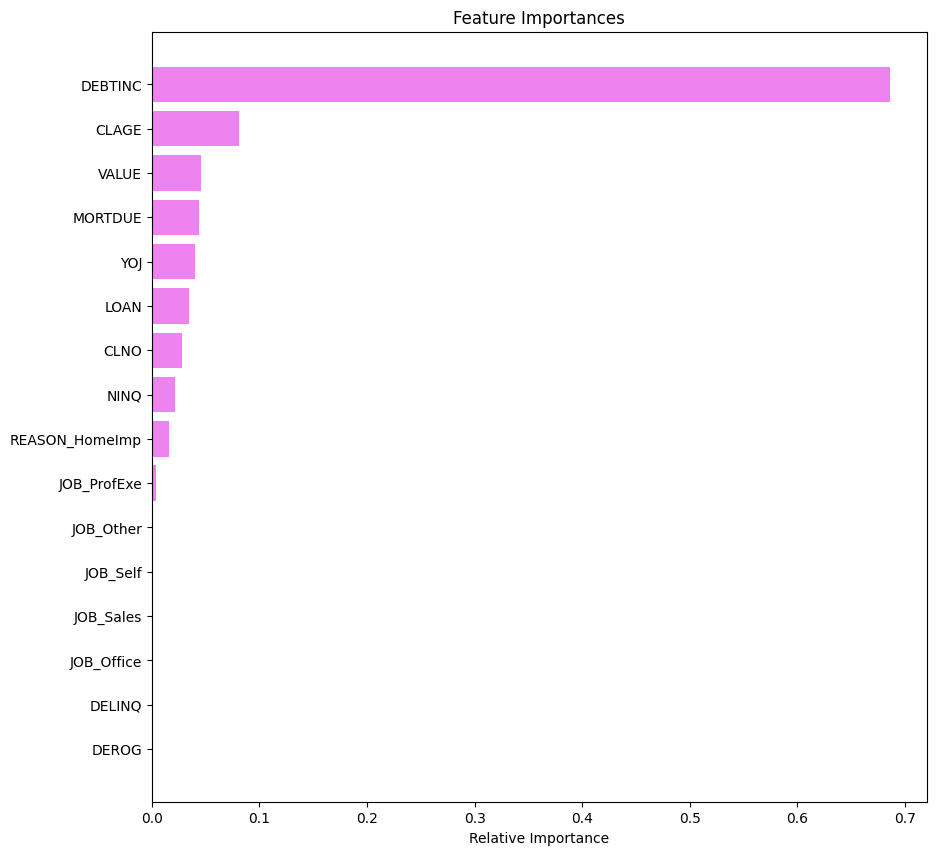

In [ ]:
# Getting graphical breakdown of feature importance
importances = dtc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- The tuned model is giving importance to 10 features. **'DEBTINC' is overwhemlingly the most important feature to predict whether a borrower defaults or not at near 70% relative importance**.
- 'CLAGE' followed by 'VALUE', 'MORTDUE', 'YOJ' and a few others also give some relative importance but all less than 10%.

### **Random Forest Classifier**

Let's build the initial random forest:

In [ ]:
# Fitting the RF classifier on training data
rf = RandomForestClassifier(random_state = 1, criterion = 'entropy')
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



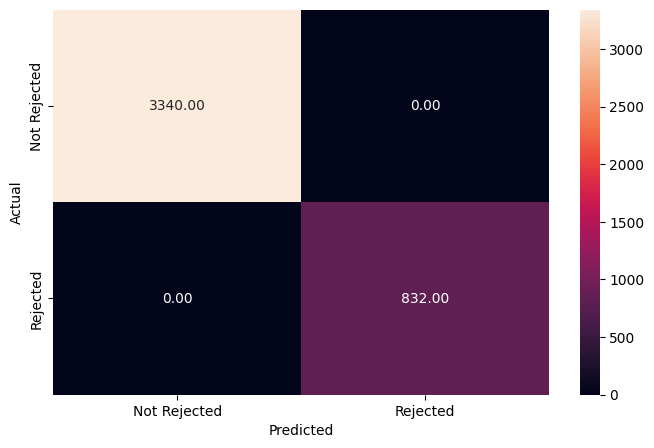

In [ ]:
# Analyzing performance on training data of original model
y_train_pred3 = rf.predict(x_train)
metrics_score(y_train, y_train_pred3)

**Observations:**

- The random forest is giving similiar, **perfect results as the original decision tree. This may be due to overfitting** on the training data.

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1431
           1       0.79      0.62      0.69       357

    accuracy                           0.89      1788
   macro avg       0.85      0.79      0.81      1788
weighted avg       0.89      0.89      0.89      1788



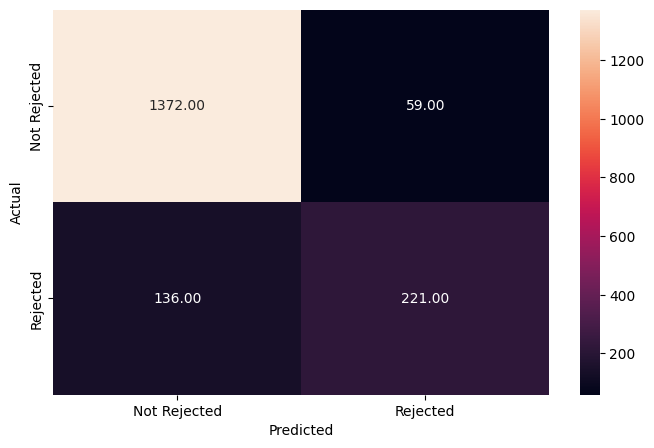

In [ ]:
# Analyzing performance on test data of original model
y_test_pred3 = rf.predict(x_test)
metrics_score(y_test, y_test_pred3)

**Observations:**

- Even though **classification performance on test data has weakened relative to that of training data, leads' conversions are predicted well. Recall of 0.62 is lower that what we would ideally like**.
- **There seems to be overfitting with the random forest and performance on test data is not as good as the original decision tree**. Let's see what improvements we can make using hyperparameter tuning.

### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
# Choosing the type of classifier
# Inverting class weights to the opposite of original data for primary class importance
rf_tuned = RandomForestClassifier(criterion = 'entropy', random_state = 1, class_weight = {0: 0.2, 1: 0.8})

# Listing parameters to choose from for grid search
parameters = {'n_estimators': [50, 100, 200, 300],
              'max_depth': [5, 10, 15],
              'max_features': [0.8, 0.9],
              'min_samples_leaf': [5, 10, 15]
             }

# Comparing parameter combinations through scoring with class 1 recall score
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
rf_grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)
rf_grid_obj = grid_obj.fit(x_train, y_train)

# Setting the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fitting the best possible algorithm to the data
rf_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=12, min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3340
           1       0.56      0.86      0.68       832

    accuracy                           0.84      4172
   macro avg       0.76      0.85      0.79      4172
weighted avg       0.88      0.84      0.85      4172



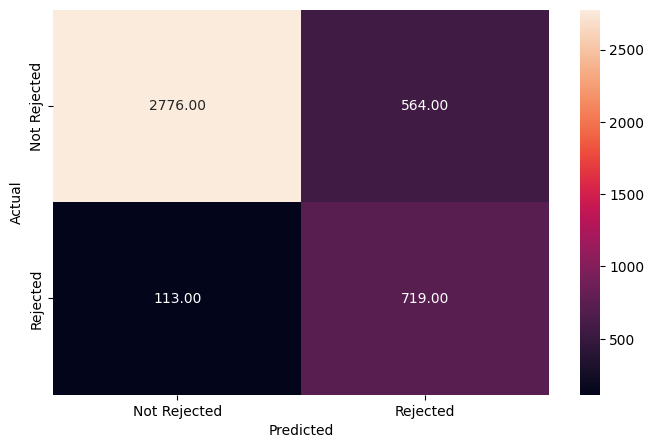

In [ ]:
# Analyzing performance on train data of tuned model
y_train_pred4 = rf_tuned.predict(x_train)
metrics_score(y_train, y_train_pred4)

**Observations:**

- Model performance matches the goal of our hyperparameter tuning: maximize recall score. **Recall score improved for class 1 to 0.86 and almost all other metrics weakened**.

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      1431
           1       0.54      0.78      0.64       357

    accuracy                           0.82      1788
   macro avg       0.74      0.81      0.76      1788
weighted avg       0.86      0.82      0.84      1788



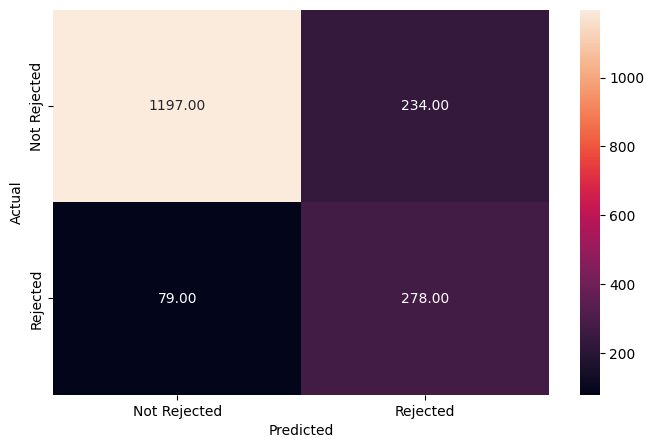

In [ ]:
# Analyzing performance on test data of tuned model
y_test_pred4 = rf_tuned.predict(x_test)
metrics_score(y_test, y_test_pred4)

**Observations:**

- **Model generalized well to test data and provided similiar outputs to training data. Recall score of 0.78 matches the tuned DT. The recall score has gone lower in the test data but not by much**. This might prove the model's robustness along with high precision scores for class 0.
- The **tuned RF has improved and provides a good indication of the factors that help leads convert into paid customers**.

Let's understand further feature importance especially since we can't plot each RF:

In [ ]:
# Getting numerical breakdown of feature importance
feat_imp = (pd.DataFrame(rf_tuned.feature_importances_, columns = ['Importance'], index = x_train.columns).sort_values(by = 'Importance', ascending = False))
print(feat_imp)

                Importance
DEBTINC              0.686
CLAGE                0.081
VALUE                0.046
MORTDUE              0.044
YOJ                  0.040
LOAN                 0.034
CLNO                 0.028
NINQ                 0.021
REASON_HomeImp       0.016
JOB_ProfExe          0.004
JOB_Other            0.000
DEROG                0.000
DELINQ               0.000
JOB_Office           0.000
JOB_Sales            0.000
JOB_Self             0.000


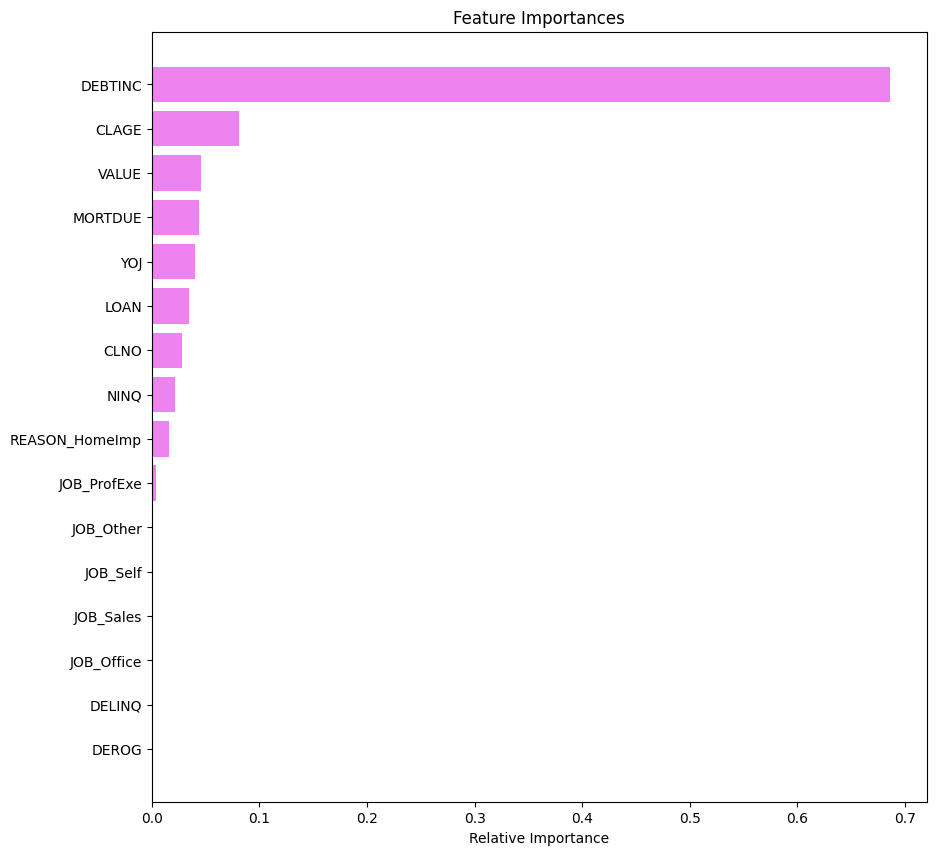

In [ ]:
# Getting graphical breakdown of feature importance
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- The **same top 10 variables that were of highest importance from the DT show up here on the RF in the same order**.
- Pruning the decision may have helped but even without that we were able distinguish among the distinct relevant features that signal a borrower's ability to default or not.
- Given our data analysis of the 'DEROG' and 'DELINQ' features, it is suprising to not see them anywhere at the top of the feature importance or decision tree nodes. This may have to do with the fact that majority of borrowers had 0 major derogatory reports and 0 delinquent credit lines.

In [ ]:
# Retrieving recall score from models
def recall_score(model, x_train = x_train, x_test = x_test):

    r = []                                                                      # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    r.append(train_recall)                                                      # adding train recall to list
    r.append(test_recall)                                                       # adding test recall to list

    return r

In [ ]:
# Retrieving precision score from models
def precision_score(model, x_train = x_train, x_test = x_test):

    p = []                                                                      # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    p.append(train_precision)                                                   # adding train precision to list
    p.append(test_precision)                                                    # adding test precision to list

    return p

In [ ]:
# Retrieving accuracy score from models
def accuracy_score(model, x_train = x_train, x_test = x_test):

    a = []                                                                      # defining an empty list to store train and test results
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    a.append(train_accuracy)                                                    # adding train accuracy to list
    a.append(test_accuracy)                                                     # adding test accuracy to list

    return a

In [ ]:
# Listing all models and attaching their respective scores
models = [lg, dtc, dtc_tuned, rf, rf_tuned]

# Defining empty lists to add train and test results
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# Looping through all the models to get scores
for model in models:
     # accuracy score
    j = accuracy_score(model)
    accuracy_train.append(j[0])
    accuracy_test.append(j[1])

    # recall score
    k = recall_score(model)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = precision_score(model)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
# Mentioning the Model names in the list.
comp_table = pd.DataFrame({'Model':['Logistic Reg', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest'],
                                          'Train_Accuracy': accuracy_train,
                                          'Test_Accuracy': accuracy_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comp_table

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Reg,0.808,0.809,0.088,0.084,0.640,0.682
1,Decision Tree,1.000,0.847,1.000,0.574,1.000,0.627
2,Tuned Decision Tree,0.838,0.825,0.864,0.779,0.560,0.543
3,Random Forest,1.000,0.891,1.000,0.619,1.000,0.789
4,Tuned Random Forest,0.838,0.825,0.864,0.779,0.560,0.543


## **Final Model Proposal**

We are proposing the tuned decision tree as the final model to be adopted and deployed to production. Due to this model's high recall score on our test data and its ease of practical understandability.

- This model's recall score will help stakeholders best identify the necessary patterns in the data to predict whether a borrower defaults or not. This metric tells the bank that a loan default is much more worrisome and catistrophic than a loss of a potential borrower along with his or her potential interest revenue. The tuned decision tree captures this worst case outcome the best out of all the models along with high enough accuracy and precision scores. Of all the clients that were accepted for a loan, only 6% of these are projected to default (false negatives).  
  - Logistic regression does a poor job at maximing recall score despite showing proficient scores for precision. Both tuned models performed similiarly giving the highest train and test recalls at 86% and 78% respectively. The random forest model performed similiary but due its complexity, the decision tree is more useful. Other tree models vastly overfit the training data.
- The simplicity of the decision trees is a huge factor towards its application. Decision trees take large sets of complex data and break it down into small, understandable choices. This model gives us an easy path to interpret the types of borrowers we can expect to default on their loan. 'DEBTINC' is the leading variable when it comes to predicting whether or not a borrower will default as seen from being the top most node or root node. Borrowers with high amounts of debt and low relative income ratio tend to default on their loan more frequently. All types of people involved - whether at the bank or among other stakeholders, can decipher various components of the model.

Our final model is not perfect however. Here are a few examples of further model considerations.
- Recall is the most important metric but we also chose a model that also emphasizes a decent precision score. Precision helps minimize false positives or borrowers that the model predicted as default borrowers but would eventually pay their loan off. Finding a model like the tuned decision tree with a 54% test precision score helps minimize such missed opportunities was also important albeit not the highest priority when managing the bank's risk management initiatives. F-1 score could have been utilized in our model analysis for comparison between optimal recall and precision scores.
- Additional tuning can be done to achieve stronger results through more parameter options and different forms of gradient boosting such as XGBoost. Pruning or removing parts of a tree to eradicate certain factors may have given stronger results. It is important to remember that the more complex we make this model (in order for it to perform better), the tougher it will be to analyze its results. This will hamper its real life application and expectations.
- The way we treated outliers and missing values gives room for the model to become bias towards certain features and end results. Even though we used logic to treat outliers and missing values, the model performance may not be the most accurate. It would be interesting to see how the model performs if outliers were kept as is and only missing values were addressed.

Nonetheless, the tuned decision tree is ready for deployment as it allows stakeholders to best accomplish their goal of maximizing profit and addressing potential default borrowers through a high recall score.  

## **Problem & Solution Summary**

Using debt financing to help pay for large purchases is a huge tool for the world economy. This process gives consumers a realistic way to provide for themselves and their loved ones with a home. It is also a viable and lucrative business model for banks and other such financial institutions. Yet, defaulting borrowers hurt a lender's profits as money they provide doesn't return back to them.

The key objective of this project is to build a forecasting model that gives banks a clear direction when analyzing its prospective borrowers.  Solving this loan default problem will enhance the simplicity of the bank's consumer credit department to approve or disapprove the home equity lines of credit of potential home buyers. Solving this problem will also save time, money, and resources by targeting specific borrowers versus others. While complying with the Equal Credit Opportunity Act's guidelines, our model will help the bank better understand borrowers and their ability to default.

To help lenders maximize their revenue and minimize costs, we will use predictive analytics among a variety of tools. Our final proposed solution is made using the tuned decision tree classification framework. Using the recall score, the model has been specifically tuned to best locate borrowers that would eventually default. A recall score of ~78% tells stakeholder that our model predicts roughly 78% of all borrowers who default correctly. This recall score maximizes true positives or borrowers who were projected to default and did in fact default and minimizes false negatives or borrowers who were projected to not default but do eventually default.

This model design is understandable and summarizes the integral factors that lead a borrower's default. The tree modeling allows for multiple clear and traceable paths to potential stakeholders and their decision making.

Debt to income ratio is at the center of our model's findings and if the bank hones on in this metric, it will lower its loan default rate. Also, more than 70% of borrowers are requesting financing for debt consolidation purposes. This may be tied to the 'DEBTINC' variable. Borrowers want to organize their debt accordingly and this may be those with high and diverse forms of debT to begin with. They can still maintain healthy credit worthiness and payback habits but more debt tied to a borrower can signal being over levered and poor purchase habits.

Other factors such the age of the oldest credit line and number of recent credit inquries can further pinpoint important patterns for the bank to focus on. With these factors, the bank won't have to do much guessing and can instead, see how former borrowers have fared in similiar circumstances. Such insight will streamline the bank's loan granting decision making process and increase profits.

## **Recommendations for Implementation**

To bring forth real life application of our recommended tuned decision tree model, stakeholders must consider a wide array of components.

1. First and foremost, in order to ensure privacy and security of client data, a thorough check of both existing and new loan approval framework should be done. No outside elements should be considered that promote any form of discrimination toward a potential borrower. These may violate the Equal Credit Opportunity Act so only access to reported financial and credit metrics should be inputted in the proposed final model design.

2. A well-thought-out timeline should be presented to monitor the results of such a model. It is imperative that the bank and relative stakeholders start with a small sample of random clients for their experimental trial of the model on unseen borrowers. The timeline should depend on the time length of an average loan given out. Of course there may be clients who default well in advance of their term but to get the most accurate data, a realistic timeline is crucial.

3. This project will involve numerous departments and their employees across many stakeholders. A smooth transition into the current loan process will gather the interests of various credit specialists such as loan officers and underwriters. Technology teams will also have to be onboarded and tasked with necessary roles for infrastructure upkeep along with their IT resources. Specific personnel along with working data scientists will have to be kept in the loop to evaluate the mode's effectiveness. This project will rely on the compliance of various parties so their cooperation must be organized.

Only once these measures are followed and complied with, should the new model intertwine its capabilities with the existing loan granting framework and then be deployed for short-scale production. Depending on the outcome of this project, stakeholders should decide further steps that may include long-term, mass scale production.

## **Benefits & Challenges**

There a multitude of benefits that stakeholders will incur as a result of the proposed loan default prediction model.

1. The level of default experienced by the banks' borrowers will decrease after use of our strategy and lead to saved financial resources. The bank will be more reluctant to provide loans to clients that the model predicts have a higher chance of defaulting. The current bank data estimates that 20% of borrowers default. Let's estimate that using our model the default rate gets split in half to 10%. That means 596 borrowers from our dataset would not have defaulted. At an average loan value of 18,607 dollars, the bank would save upwards of 11 million dollars due to less defaults.

2. Company resources and time will be preserved with the use of our strategy. Employees will need less time to manually understand each borrower and his or her situation to decide whether a loan should be granted. Less legal costs that come with borrower default would be experienced by the bank. Our model helps formulate a story for each borrower based on key metrics and such a succint, and interpretable method will save time, physical tasks like paperwork, and additional computational analysis.

3. Stakeholder integrity is maintained and can even increase based on the lender-borrower relationships and performance. The fewer the defaults experienced the more likely the bank is held to a reputable standard which permeates across the industry. Borrowers are more likely to come to this specific bank and may also be recommended by real estate agents to do. Investors in the bank will enhance growth prospects of the firm and potentially invest to expand operations.

There are also a diverse set of challenges to keep in mind while taking this approach.

1. Imperfections in actual application of our model are bound to happen. The model is not 100% default proof and will from time to time encounter borrowers that default given the model's recommendation to not grant him or her a loan. Unforeseen and rare occurences may take place and the bank will incur financial loss on certain clients. For example, our tuned tree model predicts  79 false negatives or 79 borrowers that were predicted to be accepted and pay off the loan but eventually defaulted. In relation to our dataset, this is a potential loss of ~1.5 million dollars. Our model also gives us an estimate of opportunity cost through false positives. The model decided that 234 borrowers who were not accepted because they would default were actually borrowers that would eventually would pay off their loan. This is lost revenue in the form of interest to the bank because of the model's tendency to wrongly forecast borrowers.

2. Our model gives us potential decisions to make based on the attributes of borrowers. If these borrowers change, meaning their habits, circumstances, or even the state of the nation's economy, our model may not be as robust anymore in predicting default. Other variables may influence default and the bank's loan approval process will have to modified. A seasonal model check up process should be implemented to catch new patterns in data so that future borrowers can be predicted accurately (with emphasis on recall score) and so defaults can be prevented.

3. Many computational but interpretable resources have been applied to better predict loan defaults. However, our model is one that treated outliers and missing values a certain way. This work around in model creation should be honed in on as it can lead to bias and overreliability of certain factors. Qualitative and character-based factors were also not extensively present in our data. Our model should serve as a guided recommendation and not an end-all/ be-all on how a borrower should fare. It is important to remember that even though our data and model may be full of numbers, our borrowers and lenders are truly human beings and should be treated as such when analyzing their profile and decision making.


## **Further Analysis**

The bank should look to continously revise its loan approval process to optimize its financial resources and understand its borrowers better. Here a few ideas to consider when doing so:

1. Prevent model drift through model edits and consistent training of new data
    - As time goes on, the model's accuracy will go down. It is essential to regularly retrain the model on new data and measure the model's robustness so that it still performs its indended goal of maximizing recall. Every 6-8 months may be a good time benchmark for retraining.
2. Include more categorical (and non-demographic) data options for the borrower when sending out reports
    -  More qualitivative variables in the data describing the borrower may prove inciteful to understand the borrowers' character, habits, and financial attributes.
3. Capture missing values, especially those of debt to income ratios
    - To understand the borrower better and for the model to serve its indended purpose, minimizing missing values is significant. Gaps in information can indicate weak financial health and be precursors to other unknowns. Also, since debt to income is the overwhelming leading indicator, it may be wise to gain other variables such as past credit history, credit scores, and credit utilization rate.